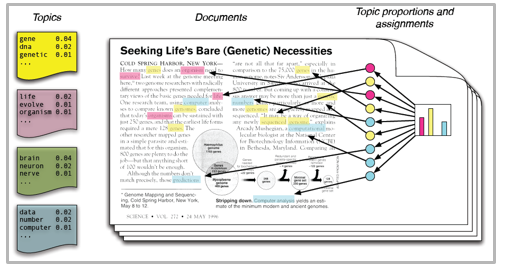

In [23]:
from IPython.display import Image
Image(filename ='E:/PIP_Devmallya/Week_3/Problem_1/Modeling1.png', width = 800, height = 200)

# Problem Statement

    Our task will be to use all of the skills have used in this course to develop a model to determine which subreddit comments originated from. Here you will be given a small dataset with examples of comments posted in different classes.

# 1. Import the Dependencies

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import ticker
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from tqdm import tqdm_notebook
import neattext as ntx
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import SnowballStemmer
from nltk.stem.porter import *
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')
%matplotlib inline
sns.set(style='darkgrid')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to C:\Users\Devmallya
[nltk_data]     Karar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# 2. Load the Dataset

In [2]:
df = pd.read_csv('E:/PIP_Devmallya/Week_3/Problem_1/vaccination_all_tweets.csv')
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [3]:
df.shape

(228207, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228207 entries, 0 to 228206
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                228207 non-null  int64 
 1   user_name         228205 non-null  object
 2   user_location     161296 non-null  object
 3   user_description  211189 non-null  object
 4   user_created      228207 non-null  object
 5   user_followers    228207 non-null  int64 
 6   user_friends      228207 non-null  int64 
 7   user_favourites   228207 non-null  int64 
 8   user_verified     228207 non-null  bool  
 9   date              228207 non-null  object
 10  text              228207 non-null  object
 11  hashtags          178504 non-null  object
 12  source            228088 non-null  object
 13  retweets          228207 non-null  int64 
 14  favorites         228207 non-null  int64 
 15  is_retweet        228207 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory

In [5]:
df.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,2.282070e+05,2.282070e+05,228207.000000,2.282070e+05,228207.000000,228207.000000
mean,1.407541e+18,9.605393e+04,986.736204,1.210417e+04,2.489284,10.819020
std,2.908485e+16,8.389053e+05,5293.500468,3.908233e+04,51.079821,199.527693
min,1.337728e+18,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.381940e+18,5.500000e+01,27.000000,5.700000e+01,0.000000,0.000000
50%,1.408133e+18,3.280000e+02,229.000000,9.960000e+02,0.000000,0.000000
75%,1.428688e+18,1.521000e+03,794.000000,7.300000e+03,1.000000,2.000000
max,1.463251e+18,1.635305e+07,582461.000000,1.299600e+06,12294.000000,54017.000000


In [6]:
df.isnull().sum()

id                      0
user_name               2
user_location       66911
user_description    17018
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            49703
source                119
retweets                0
favorites               0
is_retweet              0
dtype: int64

# 3. EDA and Data Preprocessing

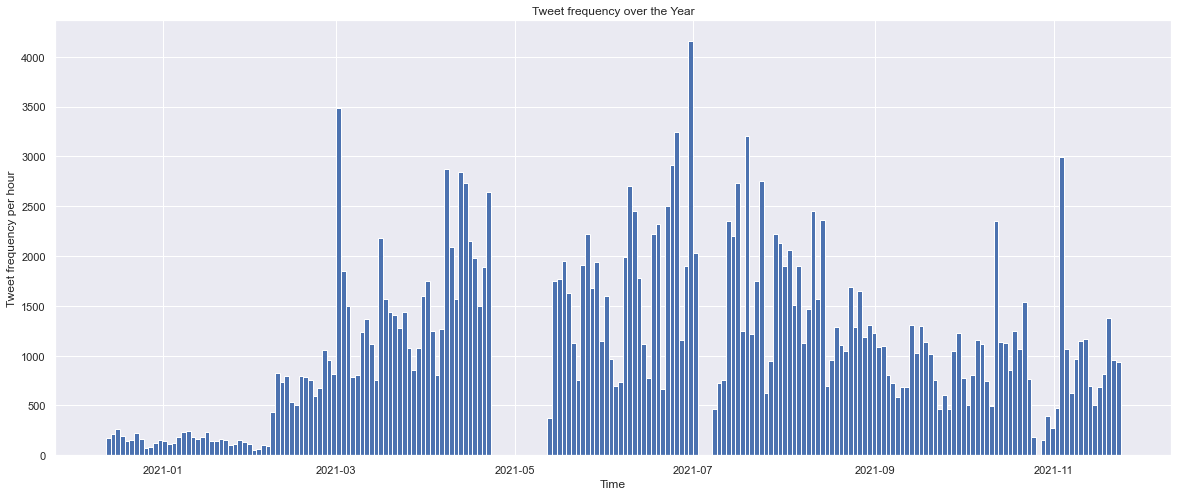

In [7]:
# Tweet activity over the year

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
ax.set(title='Tweet frequency over the Year', xlabel='Time', ylabel='Tweet frequency per hour')
plt.hist(pd.to_datetime(df.date), bins = 24*9, color = 'b')
plt.show()

In here we showed the tweet frquency throughout the year

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Bengaluru, India'),
  Text(1, 0, 'India'),
  Text(2, 0, 'New Delhi, India'),
  Text(3, 0, 'Toronto, Canada  and Worldwide'),
  Text(4, 0, 'United States'),
  Text(5, 0, 'Mumbai, India'),
  Text(6, 0, 'New Delhi'),
  Text(7, 0, 'Sri Lanka'),
  Text(8, 0, 'Beijing, China'),
  Text(9, 0, 'Mumbai'),
  Text(10, 0, 'Los Angeles, CA'),
  Text(11, 0, 'Canada'),
  Text(12, 0, 'Toronto, Ontario'),
  Text(13, 0, 'London'),
  Text(14, 0, 'London, England'),
  Text(15, 0, 'Hyderabad, India'),
  Text(16, 0, 'California, USA'),
  Text(17, 0, 'Chennai, India'),
  Text(18, 0, 'Beijing'),
  Text(19, 0, 'Malaysia')])

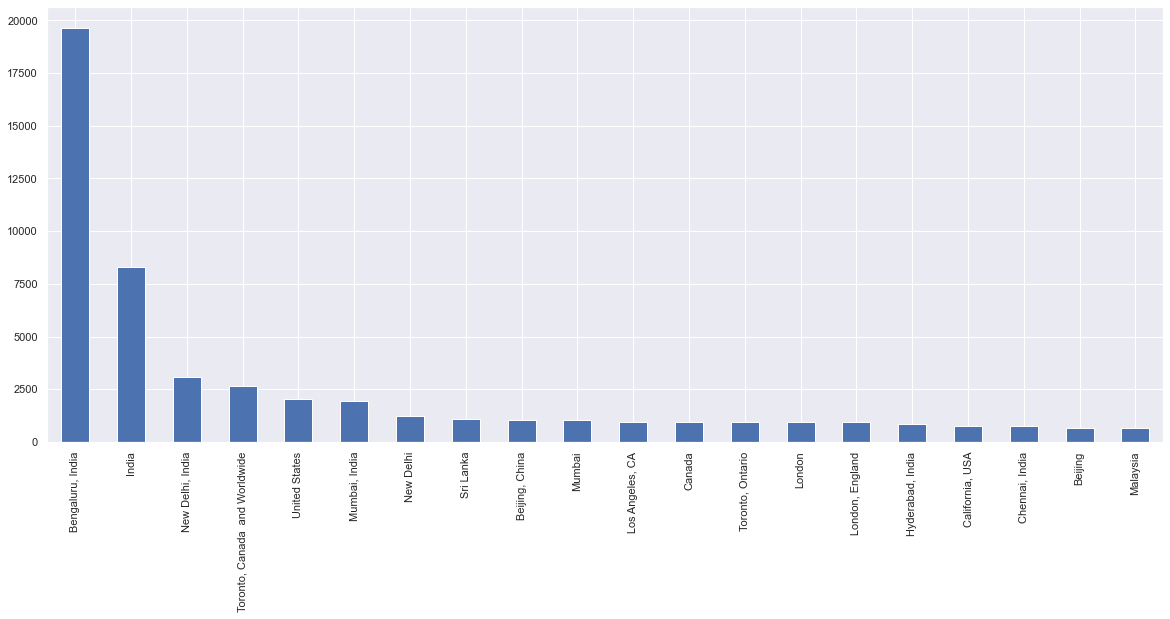

In [8]:
# Visulizing Tweet Count vs Location

plt.figure(figsize=(20,8))
df['user_location'].value_counts().nlargest(20).plot(kind='bar')
plt.xticks(rotation=90)

The highest tweet counts is from Bangalore and the lowest tweet count is in Malaysia

In [9]:
# Drop the duplicates tweets

df = df.drop_duplicates('text')
df.shape

(226373, 16)

In [10]:
df.source.value_counts()

Twitter for Android          58553
Twitter Web App              57050
Twitter for iPhone           49396
CowinAlertsBot               11276
cowin_vaccine_app            10203
                             ...  
SmarterQueue                     1
Dreamstime Promotion Tool        1
NewsFromDonbass                  1
Studiorific                      1
Cronachedellacampania            1
Name: source, Length: 379, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Twitter for Android'),
  Text(1, 0, 'Twitter Web App'),
  Text(2, 0, 'Twitter for iPhone'),
  Text(3, 0, 'CowinAlertsBot'),
  Text(4, 0, 'cowin_vaccine_app'),
  Text(5, 0, 'Cowin Vaccination Availability')])

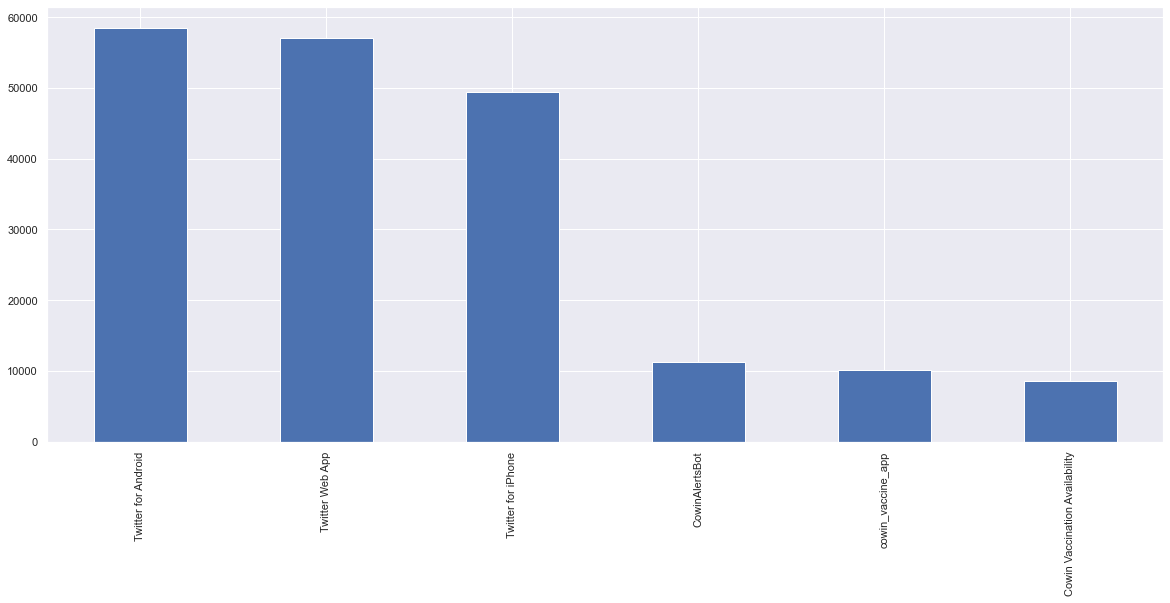

In [11]:
# Visualizing Tweet Platform-wise Distribution 
plt.figure(figsize=(20,8))
df['source'].value_counts().nlargest(6).plot(kind='bar')
plt.xticks(rotation=90)

More tweets have been done from android device than cowin vaccine app

In [12]:
# Number of days considered

print('Number of unique dates:',len(df['date'].unique()))

Number of unique dates: 220636


### We will work only on the text column which includes tweets for Topic Modeling

In [13]:
df.drop(columns={"id","user_name","user_description","user_created","user_followers", "user_friends","user_favourites","user_verified","hashtags","source","retweets","favorites","is_retweet", "user_location", "date"},inplace=True)

We dropped the unnecessary columns as we will only use the text column for predictions

In [14]:
df.head()

,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...


### Preprocessing of the text data

    Data preprocessing is a crucial step in the development of a Machine Learning model, and the results are determined by how well the data is preprocessed. The first step in the NLP model-building process is text preparation. The various text preparation steps are as follows: Tokenization. Reduce the casing's height.
    In this text data there are lots of url links, @username, punctuations, numbers, hastags, extra spaces are present. So, we will remove those unwanted letters or words from the sentences and try to clean the data. 

In [15]:
import re
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

    In the below remove_links functions we are removing the http links, bitly links which generally shows ad's. For removing the links we had used regex methode by implementing certain patterns to search those from the text.
    Also in the remove users functions we are removing the users names which are started or mentioned as @user from the tweet text.

In [16]:
def remove_links(tweet):
    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet

    Now after removing the links and users we will remove the punctuations, numbers, extra spaces, stop words from the text and also stem the words in the text.
    Stop words are a group of terms that are regularly employed in any language. The words "the," "is," and "and" are all examples of stop words in English. Stop words are used in NLP and text mining applications to remove unnecessary terms, enabling programmes to focus on the key words instead.
    In any human language, there are plenty of stop words. We eliminate the low-level information from our text by deleting these terms, allowing us to focus more on the crucial information.
    Stemming is the process of reducing a word to its word stem, which attaches to suffixes and prefixes or to the roots of words known as a lemma. Stemming is used in both natural language understanding (NLU) and natural language processing (NLP). When a new word is found, it might lead to new lines of investigation.
    Stemming is a method for removing affixes from words and retrieving the fundamental form. Pruning a tree's branches all the way down to the trunk is the same thing. For example, the stem of the phrases eating, eats, and eaten is eat. Stemming is a technique used by search engines to index words.
    A two-word sequence of words, such as "I adore" or "love reading," is referred to as a 2-gram (or bigram). A three-word sequence, such as "I adore reading," is called a 3-gram (or trigram). The bigram model, as the name implies, uses just the conditional probability of one preceding word to estimate the likelihood of a word given all prior words. The experimental findings reveal that bigrams can significantly improve feature set quality, including increases in break-even points and F1 measures. The McNemar test reveals that the gains are extremely significant in most areas.

In [17]:
my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'

# cleaning master function
def clean_tweet(tweet, bigrams=False):
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = tweet.lower() # lower case
    tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
    tweet = re.sub('\s+', ' ', tweet) #remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet) # remove numbers
    tweet_token_list = [word for word in tweet.split(' ')
                            if word not in my_stopwords] # remove stopwords

    tweet_token_list = [word_rooter(word) if '#' not in word else word
                        for word in tweet_token_list] # apply word rooter
    if bigrams:
        tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1]
                                            for i in range(len(tweet_token_list)-1)]
    tweet = ' '.join(tweet_token_list)
    return tweet

    Now applying the clean tweet function on the df.text

In [18]:
df['clean_tweet'] = df.text.apply(clean_tweet)
df.head()

,text,clean_tweet
0,Same folks said daikon paste could treat a cyt...,folk said daikon past could treat cytokin stor...
1,While the world has been on the wrong side of ...,world wrong side histori year hope biggest vac...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,#coronavirus #sputnikv #astrazeneca #pfizerbio...
3,"Facts are immutable, Senator, even when you're...",fact immut senat even ethic sturdi enough ackn...
4,Explain to me again why we need a vaccine @Bor...,explain need vaccin #whereareallthesickpeople ...


    After cleaning the text we can see their are some hastags and extra space not removed properly. So now wih the help of python library neattext we will remove those hastags from the text. 
    NeatText is a basic natural language processing (NLP) programme for cleaning textual data and text preparation.

In [19]:
# Removing hastags

df['clean_tweet'] = df['clean_tweet'].apply(ntx.remove_hashtags)
df.head()

,text,clean_tweet
0,Same folks said daikon paste could treat a cyt...,folk said daikon past could treat cytokin stor...
1,While the world has been on the wrong side of ...,world wrong side histori year hope biggest vac...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,russian vaccin creat last years…
3,"Facts are immutable, Senator, even when you're...",fact immut senat even ethic sturdi enough ackn...
4,Explain to me again why we need a vaccine @Bor...,explain need vaccin


In [20]:
df['clean_tweet'][0]

'folk said daikon past could treat cytokin storm   '

    Now we will be removing those extra spaces at the right side of the text or at the end of the text using lambda function and rstrip()

In [21]:
df["clean_tweet"] = df["clean_tweet"].apply(lambda x: x.rstrip())
df.head()

,text,clean_tweet
0,Same folks said daikon paste could treat a cyt...,folk said daikon past could treat cytokin storm
1,While the world has been on the wrong side of ...,world wrong side histori year hope biggest vac...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,russian vaccin creat last years…
3,"Facts are immutable, Senator, even when you're...",fact immut senat even ethic sturdi enough ackn...
4,Explain to me again why we need a vaccine @Bor...,explain need vaccin


In [22]:
df['clean_tweet'][0]

'folk said daikon past could treat cytokin storm'

    The CountVectorizer is a basic tool for tokenizing a set of text documents and creating a vocabulary of known words, as well as encoding new documents with that vocabulary.
    We are using count vectorizer to vectorize the words because it is the transformation of text data into numerical vectors. These vectors are then utilised to create a variety of machine learning models. In this case, we'll refer to it as extracting characteristics from text with the goal of creating numerous natural languages, processing models, and so on.

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

    In countvectorizer we used max_df because while building our vocabulary we are going to ignore terms that have really high document frquency. This essentially get's rid of terms that are really common across a lot of the documents. Where min_df show up a minimum amount of times. 

    Then we will transform the vectorize data on clean text.

In [25]:
dtm = cv.fit_transform(df['clean_tweet'])
dtm # Document Term Matrix

<226373x20051 sparse matrix of type '<class 'numpy.int64'>'
	with 1510978 stored elements in Compressed Sparse Row format>

    We're not doing any train test split because it's an unsupervised learning problem.

### Concatenating all the tweets into a list of words

In [26]:
word_list = [word for line in df['clean_tweet'] for word in line.split()]
word_list[:5]

['folk', 'said', 'daikon', 'past', 'could']

### Calculating the Term Frequency

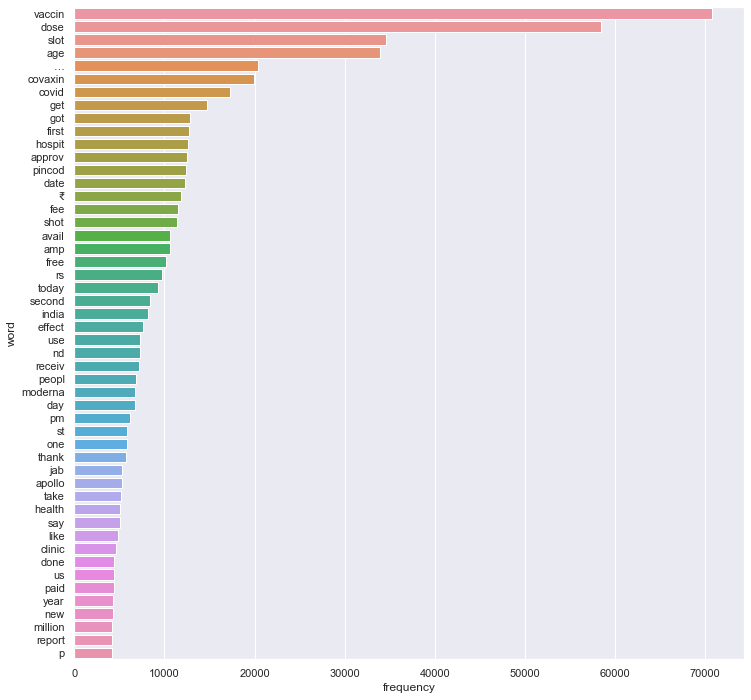

In [27]:
from collections import Counter
counts = Counter(word_list).most_common(50)
counts_df = pd.DataFrame(counts)
counts_df
counts_df.columns = ['word', 'frequency']

fig, ax = plt.subplots(figsize = (12, 12))
ax = sns.barplot(y="word", x='frequency', ax = ax, data=counts_df)
plt.savefig('wordcount_bar.png')

    From the term frequency chart we can see that the vaccine and dose words are used more frequently in all the tweets.

# 4. LDA Model

    The statistical topic modelling approach LDA (Latent Dirichlet Allocation) is widely used. In LDA, documents are represented as a collection of themes, each of which is made up of a set of words. Those individuals are discovered in a hidden layer, sometimes referred to as a latent layer. LDA is a method for tagging text in a document with a subject. It generates a model of a subject per document and a word per topic, both of which are Dirichlet distributions. It also thinks that articles cover a wide range of topics. These subjects' probability distributions are then utilised to build words.

In [28]:
from sklearn.decomposition import LatentDirichletAllocation

    n_components : Number of topics.
    random_state : Pass an int for reproducible results across multiple function calls.

In [29]:
LDA = LatentDirichletAllocation(n_components=7,random_state=42)

In [30]:
LDA.fit(dtm)

LatentDirichletAllocation(n_components=7, random_state=42)

    It takes time to run because it iterates each words on per topic so.

### Stored Words

    Now we will check the length of the stored words after fitting it in the LDA model with the help of get_feature_names() function. In here we are actually grabbing the vocabulary of the words.

In [31]:
len(cv.get_feature_names())

20051

    Now we will check 10 random words from our stored words between 0 to 20050.

In [32]:
import random

for i in range(10):
    random_word_id = random.randint(0,20050)
    print(cv.get_feature_names()[random_word_id])

midday
tbd
rachel
ct
expecte
kk
tripl
swati
louisiana
migrant


In [33]:
for i in range(10):
    random_word_id = random.randint(0,20050)
    print(cv.get_feature_names()[random_word_id])

breakdown
shipments
rishi
happe
precis
hungama
𝙏𝙤
trifecta
visa
british


###  Top Words Per Topic

    In here we are grabbing the Topics.

In [34]:
# Check the total components in LDA model
len(LDA.components_)

7

    components_ Variational parameters for the distribution of subject words. Components [i, j] may be seen as a pseudocount that indicates the number of times word j was allocated to topic I since the complete conditional for topic word distribution is a Dirichlet.

In [35]:
LDA.components_

array([[ 0.14304579,  3.14280422,  0.14438571, ...,  0.14285751,
         0.14285751,  0.1428573 ],
       [ 0.14517664,  0.14285747,  3.14436188, ...,  0.14285811,
         0.14285811,  2.1233006 ],
       [ 0.14322335,  0.14290914,  0.14285765, ...,  0.14285778,
         0.14285778,  0.14285741],
       ...,
       [14.7132295 ,  0.14285725,  0.14293362, ...,  0.14285746,
         0.14285746,  0.14285728],
       [ 0.14319916,  0.14285731,  0.14285754, ...,  0.14285765,
         0.14285765,  0.14285736],
       [ 3.83115884,  0.14285731,  1.13936362, ...,  2.1428539 ,
         2.1428539 ,  0.16281299]])

In [36]:
len(LDA.components_[0])

20051

In [37]:
# In single we will check how many components are present in one.
single_topic = LDA.components_[0]

In [38]:
single_topic.argsort()

array([15259,  1698,  3114, ...,  5267,  7299, 18636], dtype=int64)

    In here the argsort() will returns the index positions that would sort this array and showing the locations of these larger values.
    
    We are taking these single topics and then figure out what index positions we will look at for high probability words for this particular single topic.

In [39]:
single_topic[18302]

0.1428572924650089

In [40]:
single_topic[19951]

0.14285725759993897

In [41]:
# argsort ---> index positions sorted from least --> greatest
# Top 10 values (10 greatest values)
# Last 10 values of argsort()
single_topic.argsort()[-10:] # grab the last 10 values of .argsort()

array([16661, 17572,  4457, 11833, 15625, 17834, 15956,  5267,  7299,
       18636], dtype=int64)

In [42]:
top_word_indices = single_topic.argsort()[-10:]

In [43]:
for index in top_word_indices:
    print(cv.get_feature_names()[index])

st
thank
day
nd
second
today
shot
dose
got
vaccin


    We'll look at the terms that come up often in each topic. Actually we are showing top 15 words for 7 topic with the highest probability.

In [44]:
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['moderna', 'booster', 'feel', 'jab', 'covid', 'st', 'thank', 'day', 'nd', 'second', 'today', 'shot', 'dose', 'got', 'vaccin']


THE TOP 15 WORDS FOR TOPIC #1
['mumbai', 'cloudnin', 'tmc', 'sector', 'th', 'crore', 'plot', 'st', 'citi', 'dr', 'sec', 'administ', 'road', 'hospit', 'dose']


THE TOP 15 WORDS FOR TOPIC #2
['die', 'arriv', 'covid', 'man', 'old', 'year', 'million', 'paid', 'receiv', 'pm', 'free', 'avail', 'slot', 'vaccin', 'dose']


THE TOP 15 WORDS FOR TOPIC #3
['india', 'safe', 'pfizer', 'ontario', 'variant', 'canada', 'moderna', 'studi', 'amp', 'report', 'case', 'new', 'effect', 'covid', 'vaccin']


THE TOP 15 WORDS FOR TOPIC #4
['look', 'world', 'covid', 'time', 'make', 'mani', 'pleas', 'ocgn', 'like', 'want', 'know', 'need', 'amp', 'peopl', 'vaccin']


THE TOP 15 WORDS FOR TOPIC #5
['free', 'jul', 'oct', 'aug', 'sep', 'apollo', 'hospit', 'rs', 'fee', 'date', 'pincod', 'dose', 'covaxin', 'slot', 'age']


THE TOP 15 WORDS FOR TOPIC #6
['produc

### Attaching Discovered Topic Labels to Original Articles

In [45]:
dtm

<226373x20051 sparse matrix of type '<class 'numpy.int64'>'
	with 1510978 stored elements in Compressed Sparse Row format>

In [46]:
dtm.shape

(226373, 20051)

In [47]:
len(df)

226373

In [48]:
topic_results = LDA.transform(dtm)

In [49]:
topic_results.shape

(226373, 7)

In [50]:
topic_results[0]

array([0.02045133, 0.02041558, 0.02040884, 0.02042341, 0.8773843 ,
       0.02040817, 0.02050836])

In [51]:
topic_results[0].round(2)

array([0.02, 0.02, 0.02, 0.02, 0.88, 0.02, 0.02])

In [52]:
topic_results[0].argmax()

4

In [53]:
df.head()

,text,clean_tweet
0,Same folks said daikon paste could treat a cyt...,folk said daikon past could treat cytokin storm
1,While the world has been on the wrong side of ...,world wrong side histori year hope biggest vac...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,russian vaccin creat last years…
3,"Facts are immutable, Senator, even when you're...",fact immut senat even ethic sturdi enough ackn...
4,Explain to me again why we need a vaccine @Bor...,explain need vaccin


In [54]:
topic_results.argmax(axis=1)

array([4, 4, 6, ..., 2, 4, 2], dtype=int64)

In [55]:
df['Topic'] = topic_results.argmax(axis=1)

In [56]:
df.head(10)

,text,clean_tweet,Topic
0,Same folks said daikon paste could treat a cyt...,folk said daikon past could treat cytokin storm,4
1,While the world has been on the wrong side of ...,world wrong side histori year hope biggest vac...,4
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,russian vaccin creat last years…,6
3,"Facts are immutable, Senator, even when you're...",fact immut senat even ethic sturdi enough ackn...,4
4,Explain to me again why we need a vaccine @Bor...,explain need vaccin,4
5,Does anyone have any useful advice/guidance fo...,anyon use advic guidanc whether covid vaccin s...,3
6,it is a bit sad to claim the fame for success ...,bit sad claim fame success patriot competit ...,3
7,There have not been many bright days in 2020 b...,mani bright day best win,4
8,Covid vaccine; You getting it?\n\n #CovidVacci...,covid vaccin get,3
9,#CovidVaccine \n\nStates will start getting #C...,state start get monday say,6


In [57]:
df.to_csv('E:/PIP_Devmallya/Week_3/Problem_1/submissions_1.csv', index = False)
df.head()

,text,clean_tweet,Topic
0,Same folks said daikon paste could treat a cyt...,folk said daikon past could treat cytokin storm,4
1,While the world has been on the wrong side of ...,world wrong side histori year hope biggest vac...,4
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,russian vaccin creat last years…,6
3,"Facts are immutable, Senator, even when you're...",fact immut senat even ethic sturdi enough ackn...,4
4,Explain to me again why we need a vaccine @Bor...,explain need vaccin,4


    Let's visualise the subjects for interpretability now that we have a trained model. To accomplish so, we'll utilise pyLDAvis, a popular visualisation software meant to assist interactively with:

    1. Individual themes are better understood and interpreted.

    2. A better knowledge of the issues' interrelationships.

    Using varying values of the parameter, you may manually choose each topic to examine its top most common and/or "relevant" phrases for 1. When you're trying to give each issue a human-interpretable name or "meaning," this might assist.

    For (2), looking at the Intertopic Distance Plot can help you see how subjects are related to one another, as well as possible higher-level structure between groups of topics.

In [58]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(LDA, dtm, cv)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.212337 -0.009703       1        1  20.673750
0     -0.087803 -0.204954       2        1  17.836755
3     -0.226313  0.076106       3        1  14.804564
6     -0.160040  0.183361       4        1  14.407168
5      0.376353  0.188192       5        1  13.773064
2      0.098389 -0.044324       6        1  10.796207
1      0.211750 -0.188678       7        1   7.708492, topic_info=          Term          Freq         Total Category  logprob  loglift
397        age  34172.000000  34172.000000  Default  30.0000  30.0000
5267      dose  61829.000000  61829.000000  Default  29.0000  29.0000
16241     slot  34896.000000  34896.000000  Default  28.0000  28.0000
4073   covaxin  20273.000000  20273.000000  Default  27.0000  27.0000
13276   pincod  12448.000000  12448.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
17877     took    775.598910   2198.266598   Topic7  -5.0469   1.5211
11833       nd    889.535504   7204.531920   Topic7  -4.9098   0.4711
926     apollo    793.918551   5409.629715   Topic7  -5.0236   0.6439
3416    clinic    731.418742   4713.229771   Topic7  -5.1055   0.6997
13741    price    650.461152   1489.315917   Topic7  -5.2228   1.7345

[453 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
28         5  0.998099     aarthi
161        2  0.998940        ach
269        1  0.000961   administ
269        2  0.000481   administ
269        4  0.002884   administ
...      ...       ...        ...
19685      1  0.001373       year
19685      3  0.005722       year
19685      4  0.266197       year
19685      6  0.726720       year
19725      2  0.999514  yesterday

[837 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 4, 7, 6, 3, 2])

In [59]:
df.head()

,text,clean_tweet,Topic
0,Same folks said daikon paste could treat a cyt...,folk said daikon past could treat cytokin storm,4
1,While the world has been on the wrong side of ...,world wrong side histori year hope biggest vac...,4
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,russian vaccin creat last years…,6
3,"Facts are immutable, Senator, even when you're...",fact immut senat even ethic sturdi enough ackn...,4
4,Explain to me again why we need a vaccine @Bor...,explain need vaccin,4


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226373 entries, 0 to 228206
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   text         226373 non-null  object
 1   clean_tweet  226373 non-null  object
 2   Topic        226373 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 15.0+ MB


In [206]:
new_df = df.copy()

In [207]:
new_df.head()

,text,clean_tweet,Topic
0,Same folks said daikon paste could treat a cyt...,folk said daikon past could treat cytokin storm,4
1,While the world has been on the wrong side of ...,world wrong side histori year hope biggest vac...,4
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,russian vaccin creat last years…,6
3,"Facts are immutable, Senator, even when you're...",fact immut senat even ethic sturdi enough ackn...,4
4,Explain to me again why we need a vaccine @Bor...,explain need vaccin,4


In [208]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226373 entries, 0 to 228206
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   text         226373 non-null  object
 1   clean_tweet  226373 non-null  object
 2   Topic        226373 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 15.0+ MB


In [209]:
new_df['Topic'] = new_df['Topic'].astype('str')

In [210]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226373 entries, 0 to 228206
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   text         226373 non-null  object
 1   clean_tweet  226373 non-null  object
 2   Topic        226373 non-null  object
dtypes: object(3)
memory usage: 15.0+ MB


In [211]:
new_df['Topic_names'] = new_df['Topic'].map({'0': 'Took vaccine', '1': 'Place of dose taken', '2': 'Vaccine slots', '3': 'International covid news', '4': 'Places Oxygen Required', 
                               '5': 'Vaccine availability', '6': 'Vaccine trial'})

In [212]:
new_df.head()

,text,clean_tweet,Topic,Topic_names
0,Same folks said daikon paste could treat a cyt...,folk said daikon past could treat cytokin storm,4,Places Oxygen Required
1,While the world has been on the wrong side of ...,world wrong side histori year hope biggest vac...,4,Places Oxygen Required
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,russian vaccin creat last years…,6,Vaccine trial
3,"Facts are immutable, Senator, even when you're...",fact immut senat even ethic sturdi enough ackn...,4,Places Oxygen Required
4,Explain to me again why we need a vaccine @Bor...,explain need vaccin,4,Places Oxygen Required


In [213]:
new_df.shape

(226373, 4)

In [214]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226373 entries, 0 to 228206
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   text         226373 non-null  object
 1   clean_tweet  226373 non-null  object
 2   Topic        226373 non-null  object
 3   Topic_names  226373 non-null  object
dtypes: object(4)
memory usage: 16.7+ MB


In [215]:
new_df['Topic'] = new_df['Topic'].astype('int')

In [216]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226373 entries, 0 to 228206
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   text         226373 non-null  object
 1   clean_tweet  226373 non-null  object
 2   Topic        226373 non-null  int32 
 3   Topic_names  226373 non-null  object
dtypes: int32(1), object(3)
memory usage: 15.8+ MB


# log loss on clean_tweet

In [217]:
X = dtm
y = new_df['Topic']

In [218]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score, roc_auc_score, plot_confusion_matrix, log_loss

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [220]:
(X_train.shape, X_test.shape) 

((169779, 20051), (56594, 20051))

In [221]:
(y_train.shape, y_test.shape)

((169779,), (56594,))

In [222]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [223]:
random_forest_classifier_prediction =  random_forest_classifier.predict(X_test)

In [224]:
random_forest_classifier_prediction

array([4, 1, 5, ..., 0, 4, 0])

In [225]:
print('Accuracy of Random Forest:', accuracy_score(random_forest_classifier_prediction, y_test))

Accuracy of Random Forest: 0.8096794713220483


In [226]:
print(confusion_matrix(y_test, random_forest_classifier_prediction))

[[10606    92   333   338   543    11   195]
 [  238  2411   100    33   138     8    96]
 [  287    28  4953   103   149     9   125]
 [  489    34   250  5875   678    17   641]
 [ 1262   164   584  1175  9740    45  1169]
 [   15    12    12     5     7  5750    12]
 [  230    53   225   386   470    10  6488]]


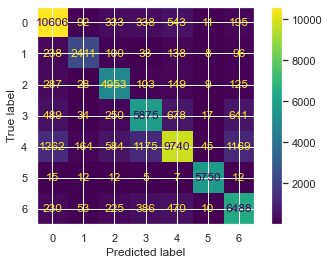

In [227]:
plot_confusion_matrix(random_forest_classifier, X_test, y_test)

In [228]:
print(classification_report(random_forest_classifier_prediction, y_test))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84     13127
           1       0.80      0.86      0.83      2794
           2       0.88      0.77      0.82      6457
           3       0.74      0.74      0.74      7915
           4       0.69      0.83      0.75     11725
           5       0.99      0.98      0.99      5850
           6       0.83      0.74      0.78      8726

    accuracy                           0.81     56594
   macro avg       0.83      0.82      0.82     56594
weighted avg       0.82      0.81      0.81     56594



In [229]:
random_forest_classifier_probs = random_forest_classifier.predict_proba(X_test)
score = log_loss(y_test, random_forest_classifier_probs)
print('Multi class log loss:', score)

Multi class log loss: 0.8035713267994227


# log loss on Topic_names

In [230]:
def clean_topic(topic):
    topic = topic.lower()
    return topic

In [231]:
new_df['clean_topic'] = new_df.Topic_names.apply(clean_topic)
new_df.head()

,text,clean_tweet,Topic,Topic_names,clean_topic
0,Same folks said daikon paste could treat a cyt...,folk said daikon past could treat cytokin storm,4,Places Oxygen Required,places oxygen required
1,While the world has been on the wrong side of ...,world wrong side histori year hope biggest vac...,4,Places Oxygen Required,places oxygen required
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,russian vaccin creat last years…,6,Vaccine trial,vaccine trial
3,"Facts are immutable, Senator, even when you're...",fact immut senat even ethic sturdi enough ackn...,4,Places Oxygen Required,places oxygen required
4,Explain to me again why we need a vaccine @Bor...,explain need vaccin,4,Places Oxygen Required,places oxygen required


In [232]:
new_df.shape

(226373, 5)

In [233]:
cv_1 = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm_1 = cv.fit_transform(new_df['clean_topic'])
dtm_1

<226373x14 sparse matrix of type '<class 'numpy.int64'>'
	with 553182 stored elements in Compressed Sparse Row format>

In [234]:
X_1 = dtm_1
y_1 = new_df['Topic']

In [235]:
y_1

0         4
1         4
2         6
3         4
4         4
         ..
228202    2
228203    2
228204    2
228205    4
228206    2
Name: Topic, Length: 226373, dtype: int32

In [236]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.25, random_state=3)

In [237]:
(X_train_1.shape, X_test_1.shape) 

((169779, 14), (56594, 14))

In [238]:
(y_train_1.shape, y_test_1.shape)

((169779,), (56594,))

In [239]:
random_forest_classifier_1 = RandomForestClassifier()
random_forest_classifier_1.fit(X_train_1, y_train_1)

RandomForestClassifier()

In [240]:
random_forest_classifier_prediction_1 =  random_forest_classifier_1.predict(X_test_1)

In [241]:
random_forest_classifier_prediction_1

array([4, 1, 5, ..., 0, 4, 3])

In [242]:
print('Accuracy of Random Forest:', accuracy_score(random_forest_classifier_prediction_1, y_test_1))

Accuracy of Random Forest: 1.0


In [243]:
print(confusion_matrix(y_test_1, random_forest_classifier_prediction_1))

[[12118     0     0     0     0     0     0]
 [    0  3024     0     0     0     0     0]
 [    0     0  5654     0     0     0     0]
 [    0     0     0  7984     0     0     0]
 [    0     0     0     0 14139     0     0]
 [    0     0     0     0     0  5813     0]
 [    0     0     0     0     0     0  7862]]


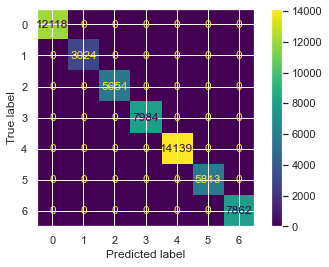

In [244]:
plot_confusion_matrix(random_forest_classifier_1, X_test_1, y_test_1)

In [245]:
print(classification_report(random_forest_classifier_prediction_1, y_test_1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12118
           1       1.00      1.00      1.00      3024
           2       1.00      1.00      1.00      5654
           3       1.00      1.00      1.00      7984
           4       1.00      1.00      1.00     14139
           5       1.00      1.00      1.00      5813
           6       1.00      1.00      1.00      7862

    accuracy                           1.00     56594
   macro avg       1.00      1.00      1.00     56594
weighted avg       1.00      1.00      1.00     56594



In [246]:
random_forest_classifier_probs_1 = random_forest_classifier_1.predict_proba(X_test_1)
score_1 = log_loss(y_test_1, random_forest_classifier_probs_1)
print('Multi class log loss:', score_1)

Multi class log loss: 6.3562102379898625e-15


In [247]:
sub_df = pd.DataFrame({'Clean_text Predictions': random_forest_classifier_prediction, 'Clean_topic Predictions': random_forest_classifier_prediction_1})

In [248]:
sub_df.head()

,Clean_text Predictions,Clean_topic Predictions
0,4,4
1,1,1
2,5,5
3,1,1
4,5,5


In [251]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56594 entries, 0 to 56593
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Clean_text Predictions   56594 non-null  int32
 1   Clean_topic Predictions  56594 non-null  int32
dtypes: int32(2)
memory usage: 442.3 KB


In [249]:
new_df.head()

,text,clean_tweet,Topic,Topic_names,clean_topic
0,Same folks said daikon paste could treat a cyt...,folk said daikon past could treat cytokin storm,4,Places Oxygen Required,places oxygen required
1,While the world has been on the wrong side of ...,world wrong side histori year hope biggest vac...,4,Places Oxygen Required,places oxygen required
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,russian vaccin creat last years…,6,Vaccine trial,vaccine trial
3,"Facts are immutable, Senator, even when you're...",fact immut senat even ethic sturdi enough ackn...,4,Places Oxygen Required,places oxygen required
4,Explain to me again why we need a vaccine @Bor...,explain need vaccin,4,Places Oxygen Required,places oxygen required


In [250]:
new_final_df = pd.concat([new_df, pd.concat([sub_df], axis=0)], axis=1)
new_final_df.head()

,text,clean_tweet,Topic,Topic_names,clean_topic,Clean_text Predictions,Clean_topic Predictions
0,Same folks said daikon paste could treat a cyt...,folk said daikon past could treat cytokin storm,4.0,Places Oxygen Required,places oxygen required,4.0,4.0
1,While the world has been on the wrong side of ...,world wrong side histori year hope biggest vac...,4.0,Places Oxygen Required,places oxygen required,1.0,1.0
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,russian vaccin creat last years…,6.0,Vaccine trial,vaccine trial,5.0,5.0
3,"Facts are immutable, Senator, even when you're...",fact immut senat even ethic sturdi enough ackn...,4.0,Places Oxygen Required,places oxygen required,1.0,1.0
4,Explain to me again why we need a vaccine @Bor...,explain need vaccin,4.0,Places Oxygen Required,places oxygen required,5.0,5.0


In [253]:
new_final_df.to_csv('E:/PIP_Devmallya/Week_3/Problem_1/submissions_topic_clf.csv', index = False)

# Techniques to Learn

## i. BOW and CBOW

### BOW

    In NLP, any algorithm that we use works with numbers. We won't be able to feed our text straight into that algorithm. As a result, the Bag of Words model is used to preprocess the text by converting it to a bag of terms that maintains track of the total number of occurrences of the most often used words.

In [60]:
import nltk
import re
import numpy as np

In [62]:
text = 'Beans. I was trying to explain to somebody as we were flying in, that’s corn. That’s beans. And they were very impressed at my agricultural knowledge. Please give it up for Amaury once again for that outstanding introduction. I have a bunch of good friends here today, including somebody who I served with, who is one of the finest senators in the country, and we’re lucky to have him, your Senator, Dick Durbin is here. I also noticed, by the way, former Governor Edgar here, who I haven’t seen in a long time, and somehow he has not aged and I have. And it’s great to see you, Governor. I want to thank President Killeen and everybody at the U of I System for making it possible for me to be here today. And I am deeply honored at the Paul Douglas Award that is being given to me. He is somebody who set the path for so much outstanding public service here in Illinois. Now, I want to start by addressing the elephant in the room. I know people are still wondering why I didn’t speak at the commencement.'
text

'Beans. I was trying to explain to somebody as we were flying in, that’s corn. That’s beans. And they were very impressed at my agricultural knowledge. Please give it up for Amaury once again for that outstanding introduction. I have a bunch of good friends here today, including somebody who I served with, who is one of the finest senators in the country, and we’re lucky to have him, your Senator, Dick Durbin is here. I also noticed, by the way, former Governor Edgar here, who I haven’t seen in a long time, and somehow he has not aged and I have. And it’s great to see you, Governor. I want to thank President Killeen and everybody at the U of I System for making it possible for me to be here today. And I am deeply honored at the Paul Douglas Award that is being given to me. He is somebody who set the path for so much outstanding public service here in Illinois. Now, I want to start by addressing the elephant in the room. I know people are still wondering why I didn’t speak at the commen

    We'll start by preprocessing the data to:

    Change the case of the text.
    Remove any characters that aren't words.
    All punctuation should be removed.

In [63]:
dataset = nltk.sent_tokenize(text)
for i in range(len(dataset)):
    dataset[i] = dataset[i].lower()
    dataset[i] = re.sub(r'\W', ' ', dataset[i])
    dataset[i] = re.sub(r'\s+', ' ', dataset[i])

In [64]:
dataset

['beans ',
 'i was trying to explain to somebody as we were flying in that s corn ',
 'that s beans ',
 'and they were very impressed at my agricultural knowledge ',
 'please give it up for amaury once again for that outstanding introduction ',
 'i have a bunch of good friends here today including somebody who i served with who is one of the finest senators in the country and we re lucky to have him your senator dick durbin is here ',
 'i also noticed by the way former governor edgar here who i haven t seen in a long time and somehow he has not aged and i have ',
 'and it s great to see you governor ',
 'i want to thank president killeen and everybody at the u of i system for making it possible for me to be here today ',
 'and i am deeply honored at the paul douglas award that is being given to me ',
 'he is somebody who set the path for so much outstanding public service here in illinois ',
 'now i want to start by addressing the elephant in the room ',
 'i know people are still wonde

    Getting the most common terms in our text.

    To create our model, we'll follow the procedures below.

    We declare a dictionary to keep track of our vocabulary.
    After that, each phrase is tokenized into words.
    Now, for each word in the statement, we look it up in our dictionary.
    If it does, the count is increased by one. If it doesn't, it's added to our lexicon with a count of one.

In [65]:
# Creating the Bag of Words model
word2count = {}
for data in dataset:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1

In [66]:
word2count

{'beans': 2,
 'i': 12,
 'was': 1,
 'trying': 1,
 'to': 8,
 'explain': 1,
 'somebody': 3,
 'as': 1,
 'we': 2,
 'were': 2,
 'flying': 1,
 'in': 5,
 'that': 4,
 's': 3,
 'corn': 1,
 'and': 7,
 'they': 1,
 'very': 1,
 'impressed': 1,
 'at': 4,
 'my': 1,
 'agricultural': 1,
 'knowledge': 1,
 'please': 1,
 'give': 1,
 'it': 3,
 'up': 1,
 'for': 5,
 'amaury': 1,
 'once': 1,
 'again': 1,
 'outstanding': 2,
 'introduction': 1,
 'have': 3,
 'a': 2,
 'bunch': 1,
 'of': 3,
 'good': 1,
 'friends': 1,
 'here': 5,
 'today': 2,
 'including': 1,
 'who': 4,
 'served': 1,
 'with': 1,
 'is': 4,
 'one': 1,
 'the': 9,
 'finest': 1,
 'senators': 1,
 'country': 1,
 're': 1,
 'lucky': 1,
 'him': 1,
 'your': 1,
 'senator': 1,
 'dick': 1,
 'durbin': 1,
 'also': 1,
 'noticed': 1,
 'by': 2,
 'way': 1,
 'former': 1,
 'governor': 2,
 'edgar': 1,
 'haven': 1,
 't': 2,
 'seen': 1,
 'long': 1,
 'time': 1,
 'somehow': 1,
 'he': 2,
 'has': 1,
 'not': 1,
 'aged': 1,
 'great': 1,
 'see': 1,
 'you': 1,
 'want': 2,
 'thank':

    We have a total of 118 words in our model. The amount of words in massive books, on the other hand, might reach millions. All of those words are unnecessary. As a result, we choose a set of the most commonly used terms. We utilise the following to do so:

In [67]:
import heapq
freq_words = heapq.nlargest(100, word2count, key=word2count.get)

    The Bag of Words model is being built.
    We create a vector in this stage that tells us if a word in each phrase is a common term or not. We set a word in a phrase to 1 if it is a common term; otherwise, we set it to 0.

In [68]:
X = []
for data in dataset:
    vector = []
    for word in freq_words:
        if word in nltk.word_tokenize(data):
            vector.append(1)
        else:
            vector.append(0)
    X.append(vector)
X = np.asarray(X)

In [69]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]])

### CBOW

    Word embedding is a language modelling technique in which words are converted into real-number vectors. It's a multi-dimensional vector space that represents words or phrases. Word embeddings may be created using a variety of methods, including neural networks, co-occurrence matrices, and probabilistic models.

    Word2Vec is a set of models for word embedding. In shallow two-layer neural networks, there is one input layer, one hidden layer, and one output layer. There are two architectures in Word2Vec:

    1. The CBOW model (Continuous Bag of Words) predicts the current word based on context words in a certain timeframe. The input layer contains the context words, whereas the output layer contains the current word. The hidden layer stores the number of dimensions in which we want to represent the current word at the output layer.
    
   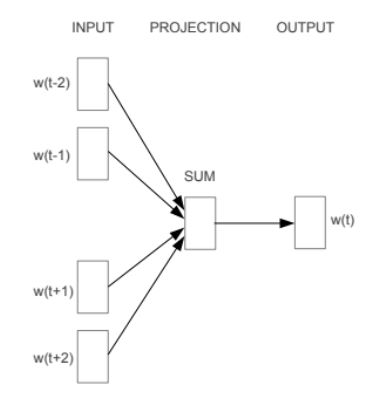
   
    2. Skip Gram: Given a current word, Skip Gram guesses the surrounding context words within a set window. The current word is in the input layer, while the context words are in the output layer. The number of dimensions in which we wish to represent the current word existing at the input layer is stored in the hidden layer.

In [74]:
# importing all necessary modules
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
  
warnings.filterwarnings(action = 'ignore')
  
import gensim
from gensim.models import Word2Vec

In [78]:
f = open("E:/PIP_Devmallya/Week_3/Problem_1/alice.txt", encoding="utf8")

In [79]:
s = f.read()

In [80]:
s

'The Project Gutenberg eBook of Alice’s Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use of anyone anywhere in the United States and\nmost other parts of the world at no cost and with almost no restrictions\nwhatsoever. You may copy it, give it away or re-use it under the terms\nof the Project Gutenberg License included with this eBook or online at\nwww.gutenberg.org. If you are not located in the United States, you\nwill have to check the laws of the country where you are located before\nusing this eBook.\n\nTitle: Alice’s Adventures in Wonderland\n\nAuthor: Lewis Carroll\n\nRelease Date: January, 1991 [eBook #11]\n[Most recently updated: October 12, 2020]\n\nLanguage: English\n\nCharacter set encoding: UTF-8\n\nProduced by: Arthur DiBianca and David Widger\n\n*** START OF THE PROJECT GUTENBERG EBOOK ALICE’S ADVENTURES IN WONDERLAND ***\n\n[Illustration]\n\n\n\n\nAlice’s Adventures in Wonderland\n\nby Lewis Carroll\n\nTHE MILLENNIUM FULCRUM EDITION 3.0\n\nConten

In [81]:
# Replaces escape character with space
f1 = s.replace("\n", " ")

In [82]:
data = []
# iterate through each sentence in the file
for i in sent_tokenize(f1):
    temp = []
    # tokenize the sentence into words
    for j in word_tokenize(i):
        temp.append(j.lower())
    data.append(temp)

In [83]:
data

[['the',
  'project',
  'gutenberg',
  'ebook',
  'of',
  'alice',
  '’',
  's',
  'adventures',
  'in',
  'wonderland',
  ',',
  'by',
  'lewis',
  'carroll',
  'this',
  'ebook',
  'is',
  'for',
  'the',
  'use',
  'of',
  'anyone',
  'anywhere',
  'in',
  'the',
  'united',
  'states',
  'and',
  'most',
  'other',
  'parts',
  'of',
  'the',
  'world',
  'at',
  'no',
  'cost',
  'and',
  'with',
  'almost',
  'no',
  'restrictions',
  'whatsoever',
  '.'],
 ['you',
  'may',
  'copy',
  'it',
  ',',
  'give',
  'it',
  'away',
  'or',
  're-use',
  'it',
  'under',
  'the',
  'terms',
  'of',
  'the',
  'project',
  'gutenberg',
  'license',
  'included',
  'with',
  'this',
  'ebook',
  'or',
  'online',
  'at',
  'www.gutenberg.org',
  '.'],
 ['if',
  'you',
  'are',
  'not',
  'located',
  'in',
  'the',
  'united',
  'states',
  ',',
  'you',
  'will',
  'have',
  'to',
  'check',
  'the',
  'laws',
  'of',
  'the',
  'country',
  'where',
  'you',
  'are',
  'located',
  'bef

In [90]:
# Create CBOW model
model1 = gensim.models.Word2Vec(data, min_count = 1, vector_size = 100, window = 5)
# Print results
print("Cosine similarity between 'alice' " + "and 'wonderland' - CBOW : ", model1.wv.similarity('alice', 'wonderland'))
print("Cosine similarity between 'alice' " + "and 'machines' - CBOW : ", model1.wv.similarity('alice', 'machines'))

Cosine similarity between 'alice' and 'wonderland' - CBOW :  0.978139
Cosine similarity between 'alice' and 'machines' - CBOW :  0.9673498


In [91]:
# Create Skip Gram model
model2 = gensim.models.Word2Vec(data, min_count = 1, vector_size = 100, window = 5, sg = 1)
# Print results
print("Cosine similarity between 'alice' " + "and 'wonderland' - Skip Gram : ", model2.wv.similarity('alice', 'wonderland'))  
print("Cosine similarity between 'alice' " + "and 'machines' - Skip Gram : ", model2.wv.similarity('alice', 'machines'))

Cosine similarity between 'alice' and 'wonderland' - Skip Gram :  0.6528637
Cosine similarity between 'alice' and 'machines' - Skip Gram :  0.80638003


### ii. TFIDF

    The abbreviation for Term Frequency is TF-IDF. Records having a Document Frequency that is inverse. It is the process of identifying the importance of a word in a sequence or corpus to a text. The frequency of a word in the corpus offsets the meaning of a term growing in proportion to how many times it appears in the text (data-set).

    Term Frequency: The frequency in document d reflects the number of times a specific term t appears. As a result, we can observe that when a term appears in the text, it gets more significant, which is reasonable. We can use a vector to describe the text in the bag of word models because the ordering of terms isn't important. There is an entry for each individual phrase in the document, with the value being the term frequency.

    The weight of a term in a document is simply proportional to the frequency of the phrase.

    tf(t,d) =  count of t in d / number of words in d

    Document Frequency: This checks the meaning of the text in the entire corpus collection, which is quite similar to TF. The sole difference is that in document d, TF represents the frequency counter for a term t, whereas df represents the number of occurrences of the term t in the document set N. To put it another way, the number of publications in which the term appears is DF.

    df(t) = number of times t appears in documents

    Inverse Document Frequency (IDF) is a test that determines how relevant a word is. The main goal of the search is to find relevant records that match the requirement. Because tf considers all words to be equally relevant, the term frequencies cannot be used to determine the weight of a term in the document. To begin, count the number of papers that include the phrase t to determine its document frequency:

    N = df(t) (t)

    where

    df(t) = Term t Document Frequency

    N(t) denotes the number of documents that include the phrase t.
    
    Although the frequency of the document is the number of independent documents in which the word appears, it is dependent on the complete corpus, term frequency is the number of appearances of a phrase in a single document only. Let's have a look at how the frequency of the inverse paper is defined. The number of documents in the corpus divided by the frequency of the text is the IDF of the term.
    
    idf(t) = N/ df(t) = N/N(t)
    
    Although the element (most definite integers) appears to be overly severe, the more common term is designed to be deemed less relevant. The logarithm (with base 2) of the inverse frequency of the paper is then calculated. As a result, the if of the word t is:
    
    idf(t) = log(N/ df(t))
    
    Tf-idf is one of the strongest metrics for determining the importance of a phrase in a series or corpus of texts. The tf-idf weighting scheme gives each word in a document a weight based on its term frequency (tf) and reciprocal document frequency (tf) (idf). Words with higher weight ratings are considered to be more meaningful.
    The tf-idf weight is usually made up of two terms:

    Term Frequency Normalized (tf)
    Inverse Document Frequency is a term that refers to the frequency with which documents (idf).
    
    tf-idf(t, d) = tf(t, d) * idf(t)

In [92]:
# import required module
from sklearn.feature_extraction.text import TfidfVectorizer

    Collect document strings and merge them into a corpus that includes strings from documents d0, d1, and d2.

In [93]:
# assign documents
d0 = 'Devmallya is Awesome'
d1 = 'Dev'
d2 = 'Great'
  
# merge documents into a single corpus
string = [d0, d1, d2]

In [94]:
# create object
tfidf = TfidfVectorizer()
  
# get tf-df values
result = tfidf.fit_transform(string)

In [95]:
# get idf values
print('\nidf values:')
for ele1, ele2 in zip(tfidf.get_feature_names(), tfidf.idf_):
    print(ele1, ':', ele2)


idf values:
awesome : 1.6931471805599454
dev : 1.6931471805599454
devmallya : 1.6931471805599454
great : 1.6931471805599454
is : 1.6931471805599454


In [96]:
# get indexing
print('\nWord indexes:')
print(tfidf.vocabulary_)
  
# display tf-idf values
print('\ntf-idf value:')
print(result)
  
# in matrix form
print('\ntf-idf values in matrix form:')
print(result.toarray())


Word indexes:
{'devmallya': 2, 'is': 4, 'awesome': 0, 'dev': 1, 'great': 3}

tf-idf value:
  (0, 0)	0.5773502691896257
  (0, 4)	0.5773502691896257
  (0, 2)	0.5773502691896257
  (1, 1)	1.0
  (2, 3)	1.0

tf-idf values in matrix form:
[[0.57735027 0.         0.57735027 0.         0.57735027]
 [0.         1.         0.         0.         0.        ]
 [0.         0.         0.         1.         0.        ]]


    Here, tf-idf values are computed from a corpus having unique values.

In [97]:
# import required module
from sklearn.feature_extraction.text import TfidfVectorizer
  
# assign documents
d0 = 'devmallya1'
d1 = 'devmallya2'
d2 = 'dev3'
d3 = 'dev4'
  
# merge documents into a single corpus
string = [d0, d1, d2, d3]
  
# create object
tfidf = TfidfVectorizer()
  
# get tf-df values
result = tfidf.fit_transform(string)
  
# get indexing
print('\nWord indexes:')
print(tfidf.vocabulary_)
  
# display tf-idf values
print('\ntf-idf values:')
print(result)


Word indexes:
{'devmallya1': 2, 'devmallya2': 3, 'dev3': 0, 'dev4': 1}

tf-idf values:
  (0, 2)	1.0
  (1, 3)	1.0
  (2, 0)	1.0
  (3, 1)	1.0


    Tf-idf values are calculated in this application using a corpus of related texts.

In [98]:
# import required module
from sklearn.feature_extraction.text import TfidfVectorizer
  
# assign documents
d0 = 'Devmallya is Awesome!'
d1 = 'Dev is Great!'

# merge documents into a single corpus
string = [d0, d1]
  
# create object
tfidf = TfidfVectorizer()
  
# get tf-df values
result = tfidf.fit_transform(string)
  
# get indexing
print('\nWord indexes:')
print(tfidf.vocabulary_)
  
# display tf-idf values
print('\ntf-idf values:')
print(result)


Word indexes:
{'devmallya': 2, 'is': 4, 'awesome': 0, 'dev': 1, 'great': 3}

tf-idf values:
  (0, 0)	0.6316672017376245
  (0, 4)	0.4494364165239821
  (0, 2)	0.6316672017376245
  (1, 3)	0.6316672017376245
  (1, 1)	0.6316672017376245
  (1, 4)	0.4494364165239821


    The software below attempts to determine the tf-idf value of a single word devmallya that appears several times in various texts.

In [99]:
# import required module
from sklearn.feature_extraction.text import TfidfVectorizer
  
# assign corpus
string = ['Devmallya devmallya']*5
  
# create object
tfidf = TfidfVectorizer()
  
# get tf-df values
result = tfidf.fit_transform(string)
  
# get indexing
print('\nWord indexes:')
print(tfidf.vocabulary_)
  
# display tf-idf values
print('\ntf-idf values:')
print(result)


Word indexes:
{'devmallya': 0}

tf-idf values:
  (0, 0)	1.0
  (1, 0)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 0)	1.0


### iii. Semantic and Syntactic Analysis

### Semantic Analysis

    Semantic Analysis

    The method of extracting meaning from text is known as semantic analysis. This analysis offers computers the ability to understand and interpret phrases, paragraphs, or entire texts by evaluating their grammatical structure and finding the links between individual words in a given context.

    As a result, the purpose of semantic analysis is to extract the text's precise or dictionary meaning. A semantic analyzer's job is to ensure that the text is meaningful.

    Because we've previously shown that lexical analysis is concerned with the meaning of words, a question arises:

    What is the difference between Semantic Analysis and Lexical Analysis?
    Smaller tokens are used in lexical analysis, but bigger chunks are used in semantic analysis.

    Because semantic analysis focuses on bigger chunks, the semantic analysis may be divided into two parts:

    Examining the Definitions of Individual Words
    It is the initial step in semantic analysis, and it entails looking at the meaning of individual words. Lexical semantics is the name for this component.

    Individual Words and Their Combinations
    In this section, we merged separate words to create sentences with meaning.

    The most crucial objective of semantic analysis is to determine the sentence's correct meaning.

    Consider the following statement as an example:

    Ram is a fantastic character.

    The speaker in the preceding statement is either referring to Lord Ram or a person with the name Ram. That is why it is critical to complete the process of determining the correct meaning of the statement.

    Machine Learning Sentiment Analysis
    We may use machine learning algorithms to do semantic analysis automatically. By feeding semantically enriched machine learning algorithms with text data samples, we can train computers to make correct predictions based on their previous findings.

    There are several sub-tasks involved in implementing a semantic-based strategy for machine learning, including

    Disambiguation of terms
    Extraction of relationships.
    Let's take a closer look at each of the duties listed above one by one.

    Disambiguation of Words
    As previously stated, natural language is ambiguous and polysemic, which means that the same word can have many meanings depending on how it is used in a phrase.

    As a result, computers employ Word Sense Disambiguation in semantic analysis with machine learning to identify which interpretation is right in the given context.

    As an example,

    Take the word "orange."
    The term above might relate to a colour, a food, or even a Florida city!

    Extraction of Relationships
    We are attempting to find semantic correlations in a text in this challenge. Relationships usually include two or more entities, such as people's names, places, companies' names, and so on.

    These entities are linked by a semantic category, such as "working at," "lives in," "is the CEO of," and "is the headquarters of."

    Consider the following phrase as an example:

    Steve Jobs is the founder and CEO of Apple, which is based in California.
    The phrase "Steve Jobs and Apple" incorporates two distinct relationships.

    Semantic Analysis Elements
    The following are some key components of semantic analysis:

    Hyponymy

    It shows the connection between a generic term and occurrences of that generic phrase. Hypernym is the general phrase, whereas hyponyms are the specific occurrences.

    As an example,

    Color is a hypernym, whereas blue, yellow, green, and other colours are hyponyms.

    Homonymy

    It is described as a group of words that have the same spelling or form but various and unconnected meanings.

    As an example,

    The word "Bat" is homonymous with another word.

    Because a bat may be used in two ways, the above term is homonymous.

    Bat is a nocturnal flying animal that can strike a ball.

    Polysemy

    Polysemy is a Greek term that roughly translates to "many signals." It's a phrase or term that has a different but comparable meaning. To put it another way, polysemy has the same spelling as polysemy but different and related meanings.

    As an example,

    Polysemy is a word that means "bank."

    The term above is a polysemy with the following definitions:

    An institution that deals with money.

    The structure in which such a facility is housed.

    A synonym for "to be able to rely on."

    Polysemy vs. Homonymy: What's the Difference?

    Both polysemy and homonymy words share the same syntax or spelling, but the fundamental distinction is that the meanings of the words in polysemy are connected, but the meanings of the words in homonymy are not.

    For example, if we use the same term "Bank" as before, the meaning may be written as:

    'a bank' or 'a river bank' are two examples.
    In such situation, it becomes a homonym since the meanings are unrelated to one another.

    Synonymy
    It symbolises the relationship between two lexical words with distinct forms but the same or similar meanings.

    As an example,

    'author/writer,' 'destiny/fate,'

    Antonymy
    It's the relationship between two lexical items with semantic components that are symmetrical in reference to an axis. The following is the scope of antonymy:

    Whether or not to use the property:

    As an example,

    'life/death,' 'certainty/incertainty'
    Use of the scalable property:

    As an example,

    'wealthy/poor,' 'hot/cold'
    An example of a usage:

    As an example,

    'Moon/Sun,' 'Father/Son'
    Meronomy
    It's described as a logical arrangement of text and words that designates a constituent portion or member of anything.

    As an example,

    a section of orange

    Representation's Meaning
    The semantic analysis generates a representation of a sentence's meaning. But, before we go into the concepts and methodologies linked to meaning representation, we must first comprehend the semantic system's building components.

    Semantic System Building Blocks
    The following construction components play a vital part in expressing the meaning of the words:

    Entities
    It reflects an individual in terms of a certain organisation, region, people's names, and so forth.

    As an example,

    Punjab, China, Chirag, and Kshitiz are all distinct individuals.
    It depicts the broad category of persons, such as a person, a city, and so on.

    The term "relationship" refers to the relationship that exists between entities and concepts.

    As an example,

    Ram is a person, according to the sentence.
    Predicates
    It is a representation of verb structures.

    As an example,

    Case Grammar and Semantic Roles

    We now understood the meaning of representation, which demonstrates how to put the pieces of a semantic system together. To put it another way, it demonstrates how to arrange entities, ideas, relations, and predicates together to represent a scenario. It also makes it possible to reason about the semantic world.

    Meaning Representation Methodologies
    For the representation of meaning in semantic analysis, the following methodologies are used:

    Predicate logic of the first order (FOPL)
    Frames for Semantic Nets
    Dependence on concepts (CD)
    Case of a rule-based architecture Grammar
    Graphs that represent concepts
    Meaningful Representations are required.
    The following are the reasons for the requirement for meaning representation:

    The connection between linguistic and non-linguistic factors
    We can link linguistic and non-linguistic aspects with the assistance of meaning representation.

    At the lexical level, representing variation
    We can represent canonical forms at the lexical level unambiguously via meaning representation.

    Reasoning may be done with it.
    With the assistance of semantic representation, one may reason about what is proper in the world as well as extract information.

    Semantics of Lexical Terms
    It's the initial step in semantic analysis, when we look at the meaning of individual words. Words, sub-words, affixes (sub-units), compound words, and phrases are all included. All words, sub-words, and other lexical elements are referred to as lexical items.

    In simple terms, lexical semantics is the link between lexical elements, sentence meaning, and sentence structure.

    The following are the stages that must be followed while doing lexical semantics:

    Lexical item classification.
    Lexical item decomposition.
    There are also comparisons and differences between distinct lexical-semantic structures.


    Semantic Analysis Techniques
    Depending on the sort of information you want to extract from the data, we may use one of the two semantic analysis methodologies listed below.

    model for text categorization (which assigns predefined categories to text)
    extractor of text (which pulls out particular information from the text).

    Models of Semantic Classification
    Classification of Subjects
    This approach organises the text into predetermined groups based on the content. Customer service teams in a corporation may wish to categorise support issues as they arrive at their help desk, and the work will be distributed depending on the category.

    Machine learning methods may identify a ticket as a "Payment issue" or a "Shipping problem" using semantic analysis.

    Analysis of Public Opinion
    The goal of sentiment analysis is to detect positive, negative, or neutral sentiments in a text to indicate urgency.

    Tagging Twitter mentions by sentiment, for example, can help you understand how customers feel about your product and discover dissatisfied customers in real time.

    Classification of Intent
    We may categorise the text based on the new user's needs.

    Models for Semantic Extraction
    Extraction of Keywords
    It's used to extract relevant words and phrases from a document. To acquire more valuable insights, this strategy can be utilised alone or in combination with one of the aforementioned strategies.

    For example, you might look at the keywords in a group of "bad" tweets and see which terms or subjects are referenced the most frequently.

    Extraction of Entities
    The goal of entity extraction is to find named entities in text, such as people's names, corporations' names, locations' names, and so on.

    This might be handy for a customer care staff to extract product names, shipment numbers, emails, and other important information from customer support tickets automatically.

#### Lesk Algorithm 

    The Lesk algorithm assumes that words in a given "neighbourhood" (section of text) share the same topic. In a simplified version of the Lesk algorithm, the dictionary definition of an unclear word is compared to the phrases in its vicinity.

    1. Tokenize the senses of the word 
    2. Tokenize the sentence
    3. Count the overlapping words
    4. Do this for all the senses

In [4]:
import nltk
from nltk.corpus import wordnet
from nltk.corpus import stopwords

In [5]:
"""Cleaning the sentence
"""
nltk.download('stopwords') 
sentence = "The frog is jumping around the bank of the river"
word = 'bank'  # the ambiguous word

from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))
#print(stop_words)

word_tokens = nltk.word_tokenize(sentence) # tokenize the sentence

# remove stopwords from word_tokens
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:  # remove the stop_words from the sentence
        filtered_sentence.append(w)  

split_sentence = filtered_sentence

print(split_sentence)

[nltk_data] Downloading package stopwords to C:\Users\Devmallya
[nltk_data]     Karar\AppData\Roaming\nltk_data...


['The', 'frog', 'jumping', 'around', 'bank', 'river']


[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# Let's see the different 'senses' of the word 'bank'
# nltk.download('wordnet')
for sense in wordnet.synsets(word):
    print(sense, sense.definition())

Synset('bank.n.01') sloping land (especially the slope beside a body of water)
Synset('depository_financial_institution.n.01') a financial institution that accepts deposits and channels the money into lending activities
Synset('bank.n.03') a long ridge or pile
Synset('bank.n.04') an arrangement of similar objects in a row or in tiers
Synset('bank.n.05') a supply or stock held in reserve for future use (especially in emergencies)
Synset('bank.n.06') the funds held by a gambling house or the dealer in some gambling games
Synset('bank.n.07') a slope in the turn of a road or track; the outside is higher than the inside in order to reduce the effects of centrifugal force
Synset('savings_bank.n.02') a container (usually with a slot in the top) for keeping money at home
Synset('bank.n.09') a building in which the business of banking transacted
Synset('bank.n.10') a flight maneuver; aircraft tips laterally about its longitudinal axis (especially in turning)
Synset('bank.v.01') tip laterally
Sy

In [7]:
# Let's consider the last sense  
sense.definition() 

'have confidence or faith in'

In [8]:
print('tokenized original sentence -               ', split_sentence)
tokenized_trust = set(nltk.word_tokenize(sense.definition()))
print('tokenized definition of the sense "trust" - ', tokenized_trust) 

tokenized original sentence -                ['The', 'frog', 'jumping', 'around', 'bank', 'river']
tokenized definition of the sense "trust" -  {'in', 'faith', 'have', 'confidence', 'or'}


In [9]:
# Let's see how many words in sense 'trust' overlaps with the words in the original sentence
# Words that occur in tokenized_trust as well as split_sentence
common_words = tokenized_trust.intersection(split_sentence) 
print(common_words)
# So there are 0 words that occur both in the original sentence and the definition of the sense 'trust' 
# count the number of these words
len(common_words)

set()


0

    Let's choose that sense of the word 'bank' which maximally overlaps with the given sentence

In [10]:
# word = 'bank'

max_overlap = 0 
best_sense = None 

for sense in wordnet.synsets(word):
    tokenized_sense = set(nltk.word_tokenize(sense.definition()))
    #print(tokenized_sense)
    common_words = tokenized_sense.intersection(split_sentence)
    #print(sense.definition(), common_words)
    overlap = len(common_words)
    
    if overlap > max_overlap: 
        max_overlap = overlap
        best_sense = sense

In [11]:
# So, the best sense of the word 'bank' is 
best_sense.definition()

'enclose with a bank'

    The lesk algorithm can be applied in a variety of ways. We may simply take the definitions for the many senses of the ambiguous term and see which definition overlaps the most with the ambiguous word's neighbouring words. The 'right sense' is then picked as the one with the most overlap with the surrounding terms.

    Now we'll use the lesk algorithm to decipher the word 'bank' in a text.

#### Lesk Algorithim using nltk

In [12]:
from nltk.wsd import lesk

In [13]:
s = "I went to the bank to deposit money"

In [14]:
lesk(s.split(), "bank")  # pass the tokenized sentence and the ambiguous word 'bank'

Synset('savings_bank.n.02')

In [15]:
(lesk(s.split(), "bank")).definition()  # print the definition of the sense

'a container (usually with a slot in the top) for keeping money at home'

In [16]:
# different senses of the word 'bank' 
from nltk.corpus import wordnet
for sense in wordnet.synsets('bank'):
    print(sense, sense.definition())

Synset('bank.n.01') sloping land (especially the slope beside a body of water)
Synset('depository_financial_institution.n.01') a financial institution that accepts deposits and channels the money into lending activities
Synset('bank.n.03') a long ridge or pile
Synset('bank.n.04') an arrangement of similar objects in a row or in tiers
Synset('bank.n.05') a supply or stock held in reserve for future use (especially in emergencies)
Synset('bank.n.06') the funds held by a gambling house or the dealer in some gambling games
Synset('bank.n.07') a slope in the turn of a road or track; the outside is higher than the inside in order to reduce the effects of centrifugal force
Synset('savings_bank.n.02') a container (usually with a slot in the top) for keeping money at home
Synset('bank.n.09') a building in which the business of banking transacted
Synset('bank.n.10') a flight maneuver; aircraft tips laterally about its longitudinal axis (especially in turning)
Synset('bank.v.01') tip laterally
Sy

#### Latent Semantic Analysis Using Word Vector

In [17]:
import nltk

In [18]:
TextCorpus = ['Seven continent planet',
'Five ocean planet', 
'Asia largest continent', 
'Pacific Ocean largest', 
'Ocean saline water']

text_tokens = [sent.split() for sent in TextCorpus]
print(text_tokens)

[['Seven', 'continent', 'planet'], ['Five', 'ocean', 'planet'], ['Asia', 'largest', 'continent'], ['Pacific', 'Ocean', 'largest'], ['Ocean', 'saline', 'water']]


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
transformer = TfidfVectorizer()
tfidf = transformer.fit_transform(TextCorpus) 

In [21]:
print('document number', 'term number')
print(tfidf)

document number term number
  (0, 6)	0.5317722537280788
  (0, 1)	0.5317722537280788
  (0, 8)	0.6591180018251055
  (1, 4)	0.46220770413113277
  (1, 2)	0.6901592662889633
  (1, 6)	0.5568161504458247
  (2, 3)	0.5317722537280788
  (2, 0)	0.6591180018251055
  (2, 1)	0.5317722537280788
  (3, 5)	0.6901592662889633
  (3, 3)	0.5568161504458247
  (3, 4)	0.46220770413113277
  (4, 9)	0.6390704413963749
  (4, 7)	0.6390704413963749
  (4, 4)	0.42799292268317357


In [22]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components = 3)
lsa = svd.fit_transform(tfidf.T)

In [23]:
lsa

array([[ 2.96093980e-01,  3.21358058e-01,  3.09860265e-01],
       [ 4.77773518e-01,  5.18539316e-01,  2.27595720e-15],
       [ 3.42561592e-01, -1.59982023e-01, -3.64540860e-01],
       [ 5.15263294e-01,  1.30197169e-01,  5.44102582e-01],
       [ 5.96632444e-01, -4.90698274e-01, -3.16296747e-15],
       [ 3.42561592e-01, -1.59982023e-01,  3.64540860e-01],
       [ 5.15263294e-01,  1.30197169e-01, -5.44102582e-01],
       [ 2.05756406e-01, -4.12736768e-01, -1.65601847e-15],
       [ 2.96093980e-01,  3.21358058e-01, -3.09860265e-01],
       [ 2.05756406e-01, -4.12736768e-01, -1.65601847e-15]])

    A matrix factorization method called Truncated Singular Value Decomposition (SVD) separates a matrix M into three matrices: U, V, and W. This is quite similar to PCA, with the distinction that the factorization in SVD is done on the data matrix, whereas it is done on the covariance matrix in PCA.

### Syntactic Analysis

    Syntactic Analysis

    Syntactic analysis, often known as syntax analysis or parsing, is the practise of using formal grammar principles to analyse natural language. Individual words are not subject to grammatical rules; instead, categories and groupings of words are. Syntactic analysis is the process of assigning a semantic structure to a piece of text.

    Take these two statements as an example:

    The Indian capital is Delhi.

    Is Delhi the capital of India?

    Although both phrases include the same words, only the first is syntactically valid and comprehensible. This difference is impossible to make using basic lexical processing approaches. To grasp the link between individual words in a phrase, more complex syntax processing algorithms are required.

    Syntactical analysis considers the following features of a phrase that lexical analysis ignores:
    The order of the words and their meaning are as follows: The goal of syntactical analysis is to figure out how words are related to one another. It will be difficult to understand the text if the word order is changed.
    Stop-word retention: Stop-words can completely alter the meaning of a phrase.
    Word morphology is the study of the structure of words. Stemming and lemmatization will reduce the words to their simplest form, changing the sentence's syntax.
    Words' parts of speech in a sentence: It's crucial to recognise a word's right part of speech. 'Cuts and bruises on his face' (here, 'slices' is a noun) and 'he cuts an apple' (here, 'cuts' is a verb) are two examples.

    Parsing
    Parsing is one of the most significant aspects of syntactic processing. It refers to the process of breaking down a phrase into its grammatical parts. Let's have a look at an example.
    Consider the following query to a question-answering (QA) system, such as Siri or Alexa: "Who won the Formula 1 championship in 2019?"
    Only if the QA system understands how the word 'Formula 1 championship' connects to the sentence 'in 2019' will it be able to answer appropriately. The term "in 2019" relates to a certain time range, which changes the question dramatically. Parsing techniques can be used to find such dependencies or links between terms in a sentence.
    To see how a parsed sentence appears, consider the following statement: "The swift brown fox jumps over the table."
    The following are the three key components of the sentence:

    The phrase 'the fast brown fox' is a noun.

    'Jumps' is a verb phrase that means 'to jump.'

    A prepositional phrase is "over the table."

    POS (part-of-speech) tagging
    Let's start with POS (speech of parts) tagging, which is the initial level of syntactic analysis. Depending on its function in the phrase, a word can be classified as a noun, verb, adjective, adverb, preposition, and so on. One of the most important roles in syntactic analysis is assigning accurate tags such as nouns, verbs, adjectives, and so on.
    You may, for example, ask Alexa or Google Home, "Ok Google, where can I acquire a permission to travel between states?" The word 'permit' might now have two POS tags: a noun and a verb. The proper tag for 'permit' in the sentence 'I need a work permit' is 'noun.' The word 'permit', on the other hand, is a'verb' in the sentence "Please permit me to walk outdoors."

    Assigning the appropriate POS tag aids in better understanding the intended meaning of a phrase or sentence, and is thus an important aspect of syntactic processing. In fact, part-of-speech tags are used to parse a phrase in all subsequent parsing approaches (constituency parsing, dependency parsing, and so on).
    Note that the POS tag set is not standard; certain books/applications may simply utilise the base forms (NN, VB, JJ, etc.) without employing granular forms, whereas NLTK does.
    Although POS tagging aids in determining the linguistic function of a word in a sentence, it does not allow us to comprehend how these words are connected to one another. As a result, the following level of syntactic analysis is necessary.

    Parsing of constituents

    To cope with natural language's ambiguity and complexity, we must first uncover and describe common grammatical patterns. The first step in learning grammar is to categorise words into constituent groups depending on their grammatical function in the sentence.
    Let's look at an example to better comprehend constituents. Consider the following sentence: 'Ishan — read — a Syntactic Analysis paper.' A component is a set of words separated by a hyphen (or a phrase). The concept of substitution, which states that a component can be replaced with another equivalent component while making the phrase syntactically legitimate, provides justification for putting these terms in a unit.
    The syntax of the statement is unaffected by substituting the constituent 'an article on Syntactic Analysis' (a noun phrase) with 'lunch' (another noun phrase), yet the subsequent sentence "Ishan read lunch" is semantically nonsensical.

    Noun Phrases (NP), Verb Phrases (VP), and Prepositional Phrases (PP) are the three most common constituents in English (PP). Other sorts of phrases exist, such as an adverbial phrase, a nominal (N), and so on, but in most circumstances, we only use the aforementioned three phrases and the nominal.
    Finally, utilising constituency parsing approaches, free word order languages like Hindi are challenging to understand. This is due to the fact that in free-word-order languages, the sequence of words/constituents can vary greatly while maintaining the same meaning. As a result, dependency parsing is required for such languages.

    Parsing Dependencies
    Constituencies (such as NP, VP, and so on) are not the major aspects of grammar in dependency grammar; rather, dependencies are constructed between words.
    Take the sentence'man saw dog' as an example.
    The dependencies are as follows:'man' is the sentence's subject (the one who is doing something);'saw' is the primary verb (something that is being done); and 'dogs' is the sentence's object (to whom something is being done).
    So, dependency parsing is based on the notion that each phrase has a subject (the doer), a verb (what is being done), and an object (to whom something is being done).
    Subject-Verb-Object (SVO) is the most common word order in modern English (sometimes known as 'strict word order'). Many phrases, of course, are too complicated to fit into this simple SVO form, though advanced dependency parsing can help.

# Tokenize text

    Corpus is the single form of the word corpus, which means "body of text." The plural of this is corpora.
    Words and their definitions are found in the Lexicon.
    Token - Each "entity" that is a component of whatever has been divided according to rules. When a phrase is "tokenized" into words, for example, each word is a token. If you tokenized the sentences from a paragraph, each sentence may be a token.

    Tokenizing is the process of separating sentences and words from the rest of the text.

In [2]:
# import the existing word and sentence tokenizing 
# libraries
from nltk.tokenize import sent_tokenize, word_tokenize
  
text = "Natural language processing (NLP) is a field " + \
       "of computer science, artificial intelligence " + \
       "and computational linguistics concerned with " + \
       "the interactions between computers and human " + \
       "(natural) languages, and, in particular, " + \
       "concerned with programming computers to " + \
       "fruitfully process large natural language " + \
       "corpora. Challenges in natural language " + \
       "processing frequently involve natural " + \
       "language understanding, natural language" + \
       "generation frequently from formal, machine" + \
       "-readable logical forms), connecting language " + \
       "and machine perception, managing human-" + \
       "computer dialog systems, or some combination " + \
       "thereof."
  
print(sent_tokenize(text))

['Natural language processing (NLP) is a field of computer science, artificial intelligence and computational linguistics concerned with the interactions between computers and human (natural) languages, and, in particular, concerned with programming computers to fruitfully process large natural language corpora.', 'Challenges in natural language processing frequently involve natural language understanding, natural languagegeneration frequently from formal, machine-readable logical forms), connecting language and machine perception, managing human-computer dialog systems, or some combination thereof.']


In [3]:
print(word_tokenize(text))

['Natural', 'language', 'processing', '(', 'NLP', ')', 'is', 'a', 'field', 'of', 'computer', 'science', ',', 'artificial', 'intelligence', 'and', 'computational', 'linguistics', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', '(', 'natural', ')', 'languages', ',', 'and', ',', 'in', 'particular', ',', 'concerned', 'with', 'programming', 'computers', 'to', 'fruitfully', 'process', 'large', 'natural', 'language', 'corpora', '.', 'Challenges', 'in', 'natural', 'language', 'processing', 'frequently', 'involve', 'natural', 'language', 'understanding', ',', 'natural', 'languagegeneration', 'frequently', 'from', 'formal', ',', 'machine-readable', 'logical', 'forms', ')', ',', 'connecting', 'language', 'and', 'machine', 'perception', ',', 'managing', 'human-computer', 'dialog', 'systems', ',', 'or', 'some', 'combination', 'thereof', '.']


    As a result, we've generated tokens, which are initially sentences and then words.

# StopWords

    A stop word is a widely used word (such as "the," "a," "an," or "in") that a search engine has been configured to disregard while indexing and retrieving results as the result of a search query.
    We don't want these terms to eat up important processing time or take up space in our database. We can simply eliminate them by keeping a list of terms that you regard to be stop words. In Python, the NLTK (Natural Language Toolkit) contains a list of stopwords in 16 different languages. They are located in the nltk data directory.

In [35]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [36]:
# Removing stop words with NLTK

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
 
example_sent = "This is a sample sentence, showing off the stop words filtration."
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(example_sent)
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
 
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)
 
print(word_tokens)
print(filtered_sentence)

['This', 'is', 'a', 'sample', 'sentence', ',', 'showing', 'off', 'the', 'stop', 'words', 'filtration', '.']
['This', 'sample', 'sentence', ',', 'showing', 'stop', 'words', 'filtration', '.']


# Lemmatization with NLTK

    Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word. 
    Stemming and lemmatization are both part of text preparation. Many individuals are perplexed by these two words. Some people conflate the two. In fact, lemmatization is preferable than stemming since it does morphological analysis on the words.
    
    Examples of lemmatization:

    -> rocks : rock
    -> corpora : corpus
    -> better : good
    
    One major difference with stemming is that lemmatize takes a part of speech parameter, “pos” If not supplied, the default is “noun.”

In [37]:
# import these modules
from nltk.stem import WordNetLemmatizer

In [38]:
lemmatizer = WordNetLemmatizer()

In [39]:
print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))

rocks : rock
corpora : corpus


In [40]:
# a denotes adjective in "pos"
print("better :", lemmatizer.lemmatize("better", pos ="a"))

better : good


# Stemming with NLTK

    The process of developing morphological variations of a root/base word is known as stemming. Stemming algorithms or stemmers are terms used to describe stemming programmes. The phrases "chocolates," "chocolatey," and "choco" are reduced to the root word "chocolate," while "retrieval," "retrieved," and "retrieves" are reduced to the stem "retrieve."
    
    Stemming Mistakes:

    Overstemming and understemming are the most common stemming problems. Overstemming happens when two words with separate stems are stemmed to the same root. When two words are stemmed to the same root but have distinct stems, this is known as under-stemming.

    The Porter stemming algorithm (also known as the 'Porter stemmer') is a method for eliminating frequent morphological and inflexional ends from English words. Its primary use is in the term normalisation process, which is typically performed while implementing Information Retrieval systems. Porter Stemmer is a popular and soft stemmer. It is quick but not particularly exact.

In [3]:
# import these modules
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
  
ps = PorterStemmer()
 
# choose some words to be stemmed
words = ["program", "programs", "programmer", "programming", "programmers"]
 
for w in words:
    print(w, "--->", ps.stem(w))

program ---> program
programs ---> program
programmer ---> programm
programming ---> program
programmers ---> programm


    Snowball Stemmer is a stemming algorithm that is also known as the Porter2 stemming method since it is an improved version of the Porter Stemmer because it addresses some of its flaws.

In [4]:
from nltk.stem import SnowballStemmer
snowball = SnowballStemmer(language='english')
words = ['generous','generate','generously','generation']
for word in words:
    print(word,"--->",snowball.stem(word))

generous ---> generous
generate ---> generat
generously ---> generous
generation ---> generat


    The most harsh stemming algorithm is Lancaster Stemmer. When we use the NLTK package to construct this method, we can also add our own unique rules. Because it is vigorous, it might produce unusual stems on occasion.

In [5]:
from nltk.stem import LancasterStemmer
lancaster = LancasterStemmer()
words = ['eating','eats','eaten','puts','putting']
for word in words:
    print(word,"--->",lancaster.stem(word))

eating ---> eat
eats ---> eat
eaten ---> eat
puts ---> put
putting ---> put


    Regex stemmer uses regular expressions to find morphological affixes. Substrings that match the regular expressions are removed.

In [6]:
from nltk.stem import RegexpStemmer
regexp = RegexpStemmer('ing$|s$|e$|able$', min=4)
words = ['mass','was','bee','computer','advisable']
for word in words:
    print(word,"--->",regexp.stem(word))

mass ---> mas
was ---> was
bee ---> bee
computer ---> computer
advisable ---> advis


# Parsing

    Top-down Parsing is a parsing strategy that starts at the top of the parse tree and works its way down applying grammatical rules while doing so. Bottom-up Parsing is a parsing strategy that starts with the lowest level of the parse tree and works its way up using grammatical rules.

#### Top down parsing

In [23]:
#Specification of CFG
import nltk 

grammar = nltk.CFG.fromstring("""
S -> NP VP
NP -> Det N | Det N PP
VP -> V | V NP | V NP PP
PP -> P NP

Det -> 'a' | 'an' | 'the'
N -> 'man' | 'park' | 'dog' | 'telescope'
V -> 'saw' | 'walked'
P -> 'in' | 'with'
""")

In [24]:
str = "the man saw a dog in the park with a telescope"

from nltk.parse import RecursiveDescentParser

#Using a top-down parser
rdstr = RecursiveDescentParser(grammar)

#Print each of the trees 
for tree in rdstr.parse(str.split()):
    print(tree)

(S
  (NP (Det the) (N man))
  (VP
    (V saw)
    (NP
      (Det a)
      (N dog)
      (PP
        (P in)
        (NP
          (Det the)
          (N park)
          (PP (P with) (NP (Det a) (N telescope))))))))
(S
  (NP (Det the) (N man))
  (VP
    (V saw)
    (NP (Det a) (N dog))
    (PP
      (P in)
      (NP
        (Det the)
        (N park)
        (PP (P with) (NP (Det a) (N telescope)))))))
(S
  (NP (Det the) (N man))
  (VP
    (V saw)
    (NP (Det a) (N dog) (PP (P in) (NP (Det the) (N park))))
    (PP (P with) (NP (Det a) (N telescope)))))


In [ ]:
# nltk.app.rdparser()
# once the recursive descent parser application opens, 
# you can edit the 'Text' and 'Grammar' according to your requirements

#### Bottom-Up parsing

In [1]:
import nltk 

grammar=nltk.CFG.fromstring("""
S -> NP VP
VP -> V NP
V -> "saw" | "ate"
NP -> "John" | "Mary" | "Bob" | Det N | Det N PP
Det -> "a" | "an" | " the" | "my"
N -> "dog"| "cat" | "cookie" | "park" 
PP -> P NP 
P -> "in" | "on" 
""")

In [2]:
str = "Mary saw a cat"

# ShiftReduce Parser is a bottom up parser
from nltk.parse import ShiftReduceParser
srp = ShiftReduceParser(grammar)

for t in srp.parse(str.split()):
    print(t)

# Shift Reduce parser tries to aggregate the string to the start symbol, since it's a bottom-up parser
# It is not able to find the parse tree even if it exists 

(S (NP Mary) (VP (V saw) (NP (Det a) (N cat))))


In [ ]:
# nltk.app.srparser()
# once the shift reduce parser application opens, 
# you can edit the 'Text' and 'Grammar' according to your requirements

#### Parsing Using PCFG

In [3]:
# define the grammar for pcfg
pcfg_grammar = nltk.PCFG.fromstring("""
    S -> NP VP [1.0] 
    PP -> P NP [1.0]
    VP -> V NP [0.7] | VP PP [0.3] 
    NP -> NP PP [0.4] 
    P -> 'with' [1.0]
    V -> 'saw' [1.0]
    NP -> 'astronomers' [0.1] | 'ears' [0.18] | 'saw' [0.04] | 'stars' [0.18] | 'telescopes' [0.1]
    """)

In [4]:
str = "astronomers saw stars with ears"

In [5]:
from nltk.parse import pchart

parser = pchart.InsideChartParser(pcfg_grammar)

#print all possible trees, showing probability of each parse
for t in parser.parse(str.split()):
     print(t)

(S
  (NP astronomers)
  (VP (V saw) (NP (NP stars) (PP (P with) (NP ears))))) (p=0.0009072)
(S
  (NP astronomers)
  (VP (VP (V saw) (NP stars)) (PP (P with) (NP ears)))) (p=0.0006804)


# POS Tagging

    A part-of-speech tag (or POS tag) is a particular label applied to each token (word) in a text corpus to denote the part of speech as well as other grammatical categories such as tense, number (plural/singular), case, and so on. POS tags are employed in text analysis tools and algorithms, as well as in corpus searches.
    
    A component of speech (hereby referred to as POS) Tags may be used to create parse trees, which are then utilised to create NERs (most named entities are Nouns) and extract relationships between words. Building lemmatizers, which are used to reduce a word to its root form, requires POS Tagging.
    
    The practise of assigning a word in a corpus to a matching component of a speech tag based on its context and meaning is known as POS tagging. This is a difficult endeavour since a word may have a varied part of speech depending on the context in which it is used.
    
    For example, answer is a noun in the statement "Give me your answer," yet it is a verb in the sentence "Answer the question."
    
    The Various POS Tagging Methodologies

    POS Tagging may be done in a variety of ways:

    Lexical Based Methods – Assigns the POS tag to the term that appears the most frequently in the training corpus.
    Rule-Based Methods – Uses rules to assign POS tags. For instance, a rule may state that words ending in "ed" or "ing" must be allocated to a verb. To allow POS Tagging of words that are not included in the training corpus but are present in the testing data, Rule-Based Techniques can be used in conjunction with Lexical-Based methods.
    Probabilistic Methods — This approach allocates POS tags depending on the likelihood that a specific tag sequence will occur. The probabilistic ways to assigning a POS Tag are Conditional Random Fields (CRFs) and Hidden Markov Models (HMMs).
    Deep Learning Methods — For POS tagging, Recurrent Neural Networks can be employed.

## POS Tagging, HMMs, Viterbi

    Let's learn how to do POS tagging by Viterbi Heuristic using tagged Treebank corpus. Before going through the code, let's first understand the pseudo-code for the same. 

    1. Tagged Treebank corpus is available (Sample data to training and test data set)
       - Basic text and structure exploration
    2. Creating HMM model on the tagged data set.
       - Calculating Emission Probabaility: P(observation|state)
       - Calculating Transition Probability: P(state2|state1)
    3. Developing algorithm for Viterbi Heuristic
    4. Checking accuracy on the test data set


## 1. Exploring Treebank Tagged Corpus

In [6]:
#Importing libraries
import nltk, re, pprint
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pprint, time
import random
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize

In [7]:
# reading the Treebank tagged sentences
wsj = list(nltk.corpus.treebank.tagged_sents())

In [8]:
# first few tagged sentences
print(wsj[:40])

[[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')], [('Mr.', 'NNP'), ('Vinken', 'NNP'), ('is', 'VBZ'), ('chairman', 'NN'), ('of', 'IN'), ('Elsevier', 'NNP'), ('N.V.', 'NNP'), (',', ','), ('the', 'DT'), ('Dutch', 'NNP'), ('publishing', 'VBG'), ('group', 'NN'), ('.', '.')], [('Rudolph', 'NNP'), ('Agnew', 'NNP'), (',', ','), ('55', 'CD'), ('years', 'NNS'), ('old', 'JJ'), ('and', 'CC'), ('former', 'JJ'), ('chairman', 'NN'), ('of', 'IN'), ('Consolidated', 'NNP'), ('Gold', 'NNP'), ('Fields', 'NNP'), ('PLC', 'NNP'), (',', ','), ('was', 'VBD'), ('named', 'VBN'), ('*-1', '-NONE-'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('of', 'IN'), ('this', 'DT'), ('British', 'JJ'), ('industrial', 'JJ'), ('conglomerate', 'NN'), ('.', '.')], [('A', 'DT'), ('f

In [9]:
# Splitting into train and test
random.seed(1234)
train_set, test_set = train_test_split(wsj,test_size=0.3)

print(len(train_set))
print(len(test_set))
print(train_set[:40])

2739
1175
[[('Mr.', 'NNP'), ('Gillespie', 'NNP'), ('at', 'IN'), ('Viacom', 'NNP'), ('says', 'VBZ'), ('0', '-NONE-'), ('the', 'DT'), ('ratings', 'NNS'), ('are', 'VBP'), ('rising', 'VBG'), ('.', '.')], [('Mr.', 'NNP'), ('Hahn', 'NNP'), ('began', 'VBD'), ('*-1', '-NONE-'), ('selling', 'VBG'), ('non-core', 'JJ'), ('businesses', 'NNS'), (',', ','), ('such', 'JJ'), ('as', 'IN'), ('oil', 'NN'), ('and', 'CC'), ('gas', 'NN'), ('and', 'CC'), ('chemicals', 'NNS'), ('.', '.')], [('About', 'IN'), ('$', '$'), ('490', 'CD'), ('million', 'CD'), ('*U*', '-NONE-'), ('of', 'IN'), ('that', 'WDT'), ('would', 'MD'), ('be', 'VB'), ('allocated', 'VBN'), ('*-87', '-NONE-'), ('to', 'TO'), ('the', 'DT'), ('buy-back', 'NN'), (',', ','), ('*', '-NONE-'), ('leaving', 'VBG'), ('about', 'IN'), ('$', '$'), ('130', 'CD'), ('million', 'CD'), ('*U*', '-NONE-'), (',', ','), ('he', 'PRP'), ('said', 'VBD'), ('0', '-NONE-'), ('*T*-1', '-NONE-'), ('.', '.')], [('The', 'DT'), ('yield', 'NN'), ('fell', 'VBD'), ('to', 'TO'), ('7

In [10]:
# Getting list of tagged words
train_tagged_words = [tup for sent in train_set for tup in sent]
len(train_tagged_words)

70339

In [11]:
# tokens 
tokens = [pair[0] for pair in train_tagged_words]
tokens[:10]

['Mr.',
 'Gillespie',
 'at',
 'Viacom',
 'says',
 '0',
 'the',
 'ratings',
 'are',
 'rising']

In [12]:
# vocabulary
V = set(tokens)
print(len(V))

10127


In [13]:
# number of tags
T = set([pair[1] for pair in train_tagged_words])
len(T)

46

In [14]:
print(T)

{'NNPS', 'WRB', 'RBS', 'JJS', 'RB', 'WP', 'VBN', 'JJ', "''", 'PRP', 'PDT', 'JJR', 'LS', 'VBP', 'NNP', 'RBR', 'PRP$', '#', 'NN', 'VB', 'MD', '.', 'WP$', '-NONE-', 'FW', ',', 'VBG', 'EX', 'TO', 'SYM', 'VBD', '$', 'VBZ', ':', 'NNS', 'RP', 'DT', 'CD', '``', '-RRB-', 'POS', 'WDT', '-LRB-', 'CC', 'IN', 'UH'}


## 2. POS Tagging Algorithm - HMM

    We'll use the HMM algorithm to tag the words. Given a sequence of words to be tagged, the task is to assign the most probable tag to the word. 

    In other words, to every word w, assign the tag t that maximises the likelihood P(t/w). Since P(t/w) = P(w/t). P(t) / P(w), after ignoring P(w), we have to compute P(w/t) and P(t).


    P(w/t) is basically the probability that given a tag (say NN), what is the probability of it being w (say 'building'). This can be computed by computing the fraction of all NNs which are equal to w, i.e. 

    P(w/t) = count(w, t) / count(t). 


    The term P(t) is the probability of tag t, and in a tagging task, we assume that a tag will depend only on the previous tag. In other words, the probability of a tag being NN will depend only on the previous tag t(n-1). So for e.g. if t(n-1) is a JJ, then t(n) is likely to be an NN since adjectives often precede a noun (blue coat, tall building etc.).


    Given the penn treebank tagged dataset, we can compute the two terms P(w/t) and P(t) and store them in two large matrices. The matrix of P(w/t) will be sparse, since each word will not be seen with most tags ever, and those terms will thus be zero. 

#### Emission Probabilities

In [15]:
# computing P(w/t) and storing in T x V matrix
t = len(T)
v = len(V)
w_given_t = np.zeros((t, v))

In [16]:
# compute word given tag: Emission Probability
def word_given_tag(word, tag, train_bag = train_tagged_words):
    tag_list = [pair for pair in train_bag if pair[1]==tag]
    count_tag = len(tag_list)
    w_given_tag_list = [pair[0] for pair in tag_list if pair[0]==word]
    count_w_given_tag = len(w_given_tag_list)
    
    return (count_w_given_tag, count_tag)

In [17]:
# examples

# large
print("\n", "large")
print(word_given_tag('large', 'JJ'))
print(word_given_tag('large', 'VB'))
print(word_given_tag('large', 'NN'), "\n")

# will
print("\n", "will")
print(word_given_tag('will', 'MD'))
print(word_given_tag('will', 'NN'))
print(word_given_tag('will', 'VB'))

# book
print("\n", "book")
print(word_given_tag('book', 'NN'))
print(word_given_tag('book', 'VB'))


 large
(19, 4089)
(0, 1784)
(0, 9248) 


 will
(194, 641)
(1, 9248)
(0, 1784)

 book
(5, 9248)
(1, 1784)


#### Transition Probabilities

In [18]:
# compute tag given tag: tag2(t2) given tag1 (t1), i.e. Transition Probability

def t2_given_t1(t2, t1, train_bag = train_tagged_words):
    tags = [pair[1] for pair in train_bag]
    count_t1 = len([t for t in tags if t==t1])
    count_t2_t1 = 0
    for index in range(len(tags)-1):
        if tags[index]==t1 and tags[index+1] == t2:
            count_t2_t1 += 1
    return (count_t2_t1, count_t1)

In [19]:
# examples
print(t2_given_t1(t2='NNP', t1='JJ'))
print(t2_given_t1('NN', 'JJ'))
print(t2_given_t1('NN', 'DT'))
print(t2_given_t1('NNP', 'VB'))
print(t2_given_t1(',', 'NNP'))
print(t2_given_t1('PRP', 'PRP'))
print(t2_given_t1('VBG', 'NNP'))

(141, 4089)
(1822, 4089)
(2683, 5695)
(61, 1784)
(990, 6594)
(2, 1163)
(4, 6594)


In [20]:
#Please note P(tag|start) is same as P(tag|'.')
print(t2_given_t1('DT', '.'))
print(t2_given_t1('VBG', '.'))
print(t2_given_t1('NN', '.'))
print(t2_given_t1('NNP', '.'))

(603, 2708)
(9, 2708)
(124, 2708)
(495, 2708)


In [21]:
# creating t x t transition matrix of tags
# each column is t2, each row is t1
# thus M(i, j) represents P(tj given ti)

tags_matrix = np.zeros((len(T), len(T)), dtype='float32')
for i, t1 in enumerate(list(T)):
    for j, t2 in enumerate(list(T)): 
        tags_matrix[i, j] = t2_given_t1(t2, t1)[0]/t2_given_t1(t2, t1)[1]

In [22]:
tags_matrix

array([[0.01098901, 0.        , 0.        , ..., 0.06593407, 0.08791209,
        0.        ],
       [0.        , 0.        , 0.00854701, ..., 0.        , 0.02564103,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.08695652,
        0.        ],
       ...,
       [0.00191449, 0.00319081, 0.        , ..., 0.        , 0.05105297,
        0.        ],
       [0.00215208, 0.00129125, 0.        , ..., 0.00071736, 0.01721664,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.33333334,
        0.        ]], dtype=float32)

In [23]:
# convert the matrix to a df for better readability
tags_df = pd.DataFrame(tags_matrix, columns = list(T), index=list(T))

In [24]:
tags_df

,NNPS,WRB,RBS,JJS,RB,WP,VBN,JJ,'',PRP,...,DT,CD,``,-RRB-,POS,WDT,-LRB-,CC,IN,UH
NNPS,0.010989,0.000000,0.000000,0.000000,0.005495,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.016484,0.000000,0.005495,0.000000,0.049451,0.000000,0.000000,0.065934,0.087912,0.000000
WRB,0.000000,0.000000,0.008547,0.000000,0.025641,0.000000,0.000000,0.102564,0.000000,0.145299,...,0.316239,0.017094,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025641,0.000000
RBS,0.000000,0.000000,0.000000,0.000000,0.217391,0.000000,0.000000,0.695652,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.086957,0.000000
JJS,0.007463,0.000000,0.000000,0.000000,0.044776,0.000000,0.014925,0.134328,0.000000,0.000000,...,0.014925,0.067164,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.156716,0.000000
RB,0.000504,0.001511,0.000000,0.000504,0.073048,0.002015,0.103275,0.098741,0.001008,0.002015,...,0.052897,0.039295,0.001511,0.000000,0.000000,0.001008,0.000504,0.007053,0.117380,0.000000
WP,0.000000,0.000000,0.005988,0.000000,0.017964,0.000000,0.000000,0.005988,0.000000,0.035928,...,0.035928,0.005988,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023952,0.000000
VBN,0.000000,0.000000,0.000670,0.000000,0.022118,0.001340,0.026810,0.038204,0.002681,0.002681,...,0.051609,0.008043,0.004021,0.000000,0.000000,0.000000,0.000000,0.006702,0.079759,0.000000
JJ,0.001223,0.000978,0.000000,0.000489,0.003179,0.000000,0.003179,0.064808,0.004647,0.000734,...,0.003668,0.021277,0.001956,0.000000,0.000000,0.000000,0.000245,0.016141,0.062118,0.000000
'',0.000000,0.004237,0.000000,0.002119,0.016949,0.000000,0.002119,0.016949,0.008475,0.095339,...,0.116525,0.002119,0.019068,0.000000,0.000000,0.010593,0.010593,0.063559,0.131356,0.000000
PRP,0.000000,0.000000,0.000000,0.000000,0.037833,0.001720,0.003439,0.006879,0.000000,0.001720,...,0.009458,0.000860,0.005159,0.000860,0.000000,0.000000,0.001720,0.011178,0.036973,0.000000


In [25]:
tags_df.loc['.', :]

NNPS      0.002216
WRB       0.006278
RBS       0.000369
JJS       0.001477
RB        0.045421
WP        0.002954
VBN       0.001108
JJ        0.035081
''        0.055022
PRP       0.055391
PDT       0.001108
JJR       0.002585
LS        0.001477
VBP       0.000000
NNP       0.182792
RBR       0.000739
PRP$      0.007016
#         0.000000
NN        0.045790
VB        0.001108
MD        0.000369
.         0.000000
WP$       0.000000
-NONE-    0.019202
FW        0.000000
,         0.000000
VBG       0.003323
EX        0.003323
TO        0.001108
SYM       0.000000
VBD       0.000369
$         0.001108
VBZ       0.002216
:         0.002585
NNS       0.038405
RP        0.000000
DT        0.222674
CD        0.007755
``        0.066839
-RRB-     0.005170
POS       0.000000
WDT       0.000739
-LRB-     0.004431
CC        0.049483
IN        0.122230
UH        0.000369
Name: ., dtype: float32

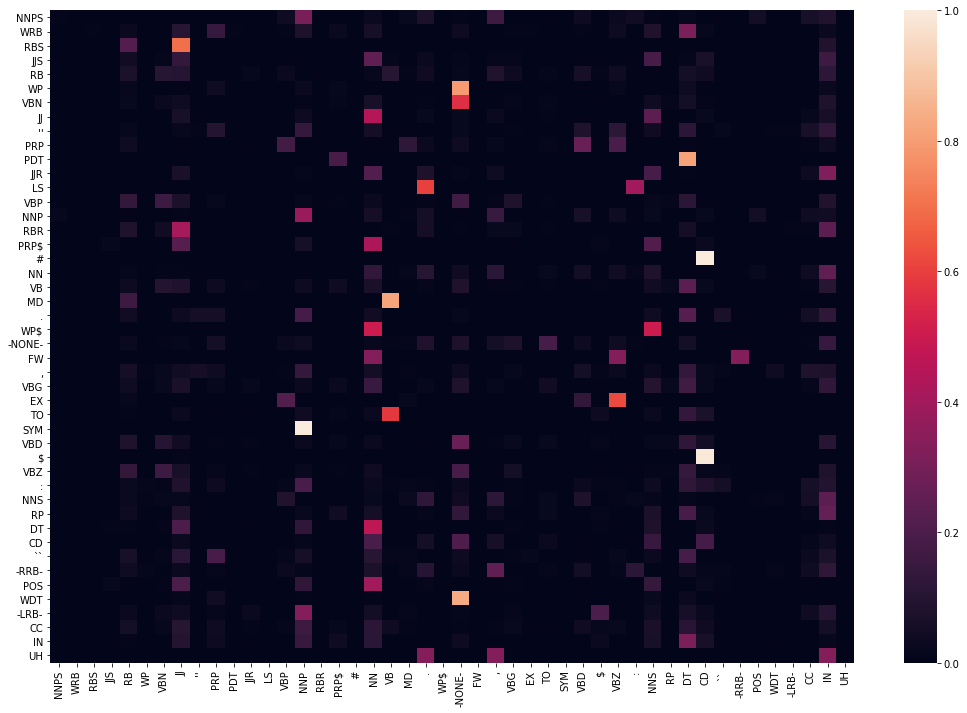

In [26]:
# heatmap of tags matrix
# T(i, j) means P(tag j given tag i)
plt.figure(figsize=(18, 12))
sns.heatmap(tags_df)
plt.show()

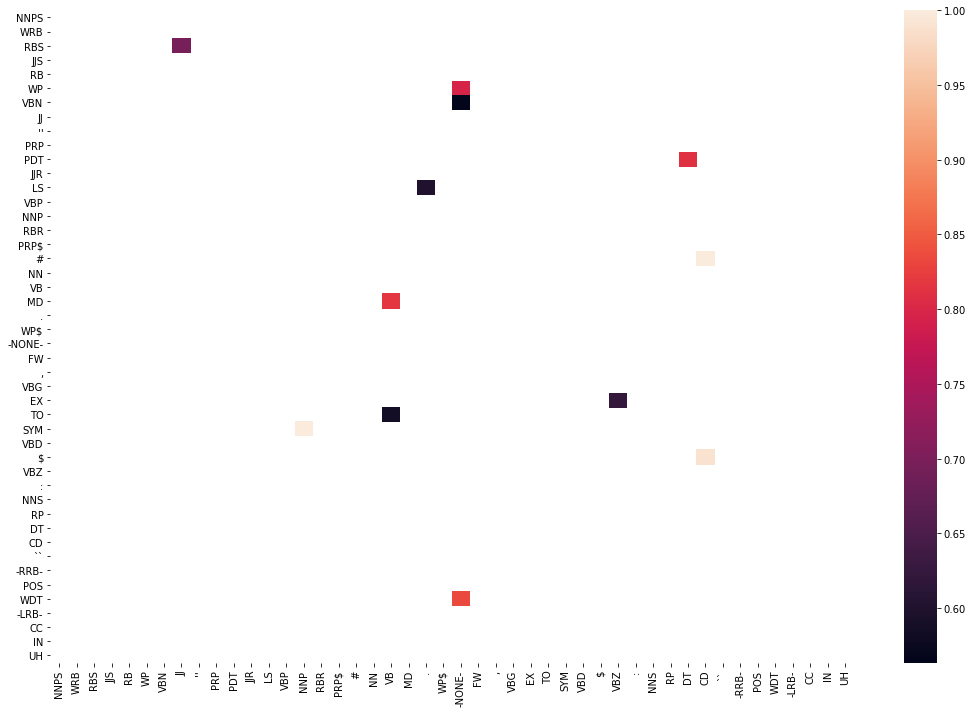

In [27]:
# frequent tags
# filter the df to get P(t2, t1) > 0.5
tags_frequent = tags_df[tags_df>0.5]
plt.figure(figsize=(18, 12))
sns.heatmap(tags_frequent)
plt.show()

## 3. Viterbi Algorithm

    Let's now use the computed probabilities P(w, tag) and P(t2, t1) to assign tags to each word in the document. We'll run through each word w and compute P(tag/w)=P(w/tag).P(tag) for each tag in the tag set, and then assign the tag having the max P(tag/w).

    We'll store the assigned tags in a list of tuples, similar to the list 'train_tagged_words'. Each tuple will be a (token, assigned_tag). As we progress further in the list, each tag to be assigned will use the tag of the previous token.

    Note: P(tag|start) = P(tag|'.') 

In [28]:
len(train_tagged_words)

70339

In [29]:
# Viterbi Heuristic
def Viterbi(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = []
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p    
            p.append(state_probability)
        pmax = max(p)
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)] 
        state.append(state_max)
    return list(zip(words, state))

#### Evaluating on Test Set

In [30]:
# Running on entire test dataset would take more than 3-4hrs. 
# Let's test our Viterbi algorithm on a few sample sentences of test dataset

random.seed(1234)

# choose random 5 sents
rndom = [random.randint(1,len(test_set)) for x in range(5)]

# list of sents
test_run = [test_set[i] for i in rndom]

# list of tagged words
test_run_base = [tup for sent in test_run for tup in sent]

# list of untagged words
test_tagged_words = [tup[0] for sent in test_run for tup in sent]
test_run

[[('``', '``'),
  ('Actually', 'RB'),
  (',', ','),
  ('the', 'DT'),
  ('long', 'JJ'),
  ('deterioration', 'NN'),
  ('in', 'IN'),
  ('daily', 'JJ'),
  ('newspapers', 'NNS'),
  ('shows', 'VBZ'),
  ('signs', 'NNS'),
  ('of', 'IN'),
  ('*', '-NONE-'),
  ('coming', 'VBG'),
  ('to', 'TO'),
  ('an', 'DT'),
  ('end', 'NN'),
  (',', ','),
  ('and', 'CC'),
  ('the', 'DT'),
  ('industry', 'NN'),
  ('looks', 'VBZ'),
  ('pretty', 'RB'),
  ('healthy', 'JJ'),
  ('.', '.'),
  ("''", "''")],
 [('While', 'IN'),
  ('the', 'DT'),
  ('Senate', 'NNP'),
  ('Commerce', 'NNP'),
  ('Committee', 'NNP'),
  ('has', 'VBZ'),
  ('approved', 'VBN'),
  ('legislation', 'NN'),
  ('similar', 'JJ'),
  ('to', 'TO'),
  ('the', 'DT'),
  ('House', 'NNP'),
  ('bill', 'NN'),
  ('on', 'IN'),
  ('airline', 'NN'),
  ('leveraged', 'JJ'),
  ('buy-outs', 'NNS'),
  (',', ','),
  ('the', 'DT'),
  ('measure', 'NN'),
  ('has', 'VBZ'),
  ("n't", 'RB'),
  ('yet', 'RB'),
  ('come', 'VBN'),
  ('to', 'TO'),
  ('the', 'DT'),
  ('full', 'JJ'),


In [31]:
# tagging the test sentences
start = time.time()
tagged_seq = Viterbi(test_tagged_words)
end = time.time()
difference = end-start

In [32]:
print("Time taken in seconds: ", difference)
print(tagged_seq)

Time taken in seconds:  142.43464493751526
[('``', '``'), ('Actually', 'NNPS'), (',', ','), ('the', 'DT'), ('long', 'JJ'), ('deterioration', 'NN'), ('in', 'IN'), ('daily', 'JJ'), ('newspapers', 'NNS'), ('shows', 'VBZ'), ('signs', 'NNS'), ('of', 'IN'), ('*', '-NONE-'), ('coming', 'VBG'), ('to', 'TO'), ('an', 'DT'), ('end', 'NN'), (',', ','), ('and', 'CC'), ('the', 'DT'), ('industry', 'NN'), ('looks', 'NNPS'), ('pretty', 'RB'), ('healthy', 'JJ'), ('.', '.'), ("''", "''"), ('While', 'IN'), ('the', 'DT'), ('Senate', 'NNP'), ('Commerce', 'NNP'), ('Committee', 'NNP'), ('has', 'VBZ'), ('approved', 'VBN'), ('legislation', 'NN'), ('similar', 'JJ'), ('to', 'TO'), ('the', 'DT'), ('House', 'NNP'), ('bill', 'NN'), ('on', 'IN'), ('airline', 'NN'), ('leveraged', 'JJ'), ('buy-outs', 'NNS'), (',', ','), ('the', 'DT'), ('measure', 'NN'), ('has', 'VBZ'), ("n't", 'RB'), ('yet', 'RB'), ('come', 'VB'), ('to', 'TO'), ('the', 'DT'), ('full', 'JJ'), ('floor', 'NN'), ('.', '.'), ('Also', 'RB'), ('contributing',

In [33]:
# accuracy
check = [i for i, j in zip(tagged_seq, test_run_base) if i == j] 

In [34]:
accuracy = len(check)/len(tagged_seq)

In [35]:
accuracy

0.9230769230769231

In [36]:
incorrect_tagged_cases = [[test_run_base[i-1],j] for i, j in enumerate(zip(tagged_seq, test_run_base)) if j[0]!=j[1]]

In [37]:
incorrect_tagged_cases

[[('``', '``'), (('Actually', 'NNPS'), ('Actually', 'RB'))],
 [('industry', 'NN'), (('looks', 'NNPS'), ('looks', 'VBZ'))],
 [('yet', 'RB'), (('come', 'VB'), ('come', 'VBN'))],
 [('Chicago', 'NNP'), (('purchasing', 'NN'), ('purchasing', 'VBG'))],
 [('*T*-1', '-NONE-'), (('precedes', 'NNPS'), ('precedes', 'VBZ'))],
 [('full', 'JJ'), (('purchasing', 'NN'), ('purchasing', 'VBG'))],
 [('report', 'NN'), (('that', 'IN'), ('that', 'WDT'))],
 [('No', 'DT'), (('one', 'CD'), ('one', 'NN'))],
 [('to', 'TO'), (('pick', 'NNPS'), ('pick', 'VB'))],
 [('pick', 'VB'), (('up', 'IN'), ('up', 'RP'))],
 [('its', 'PRP$'), (('marbles', 'NNPS'), ('marbles', 'NNS'))],
 [('go', 'VB'), (('home', 'NN'), ('home', 'RB'))]]

In [38]:
## Testing
sentence_test = 'Twitter is the best networking social site. Man is a social animal. Data science is an emerging field. Data science jobs are high in demand.'
words = word_tokenize(sentence_test)

start = time.time()
tagged_seq = Viterbi(words)
end = time.time()
difference = end-start

In [39]:
print(tagged_seq)
print(difference)

[('Twitter', 'NNPS'), ('is', 'VBZ'), ('the', 'DT'), ('best', 'JJS'), ('networking', 'NN'), ('social', 'JJ'), ('site', 'NNPS'), ('.', '.'), ('Man', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('social', 'JJ'), ('animal', 'NNPS'), ('.', '.'), ('Data', 'NNP'), ('science', 'NN'), ('is', 'VBZ'), ('an', 'DT'), ('emerging', 'NNPS'), ('field', 'NN'), ('.', '.'), ('Data', 'NNP'), ('science', 'NN'), ('jobs', 'NNS'), ('are', 'VBP'), ('high', 'JJ'), ('in', 'IN'), ('demand', 'NN'), ('.', '.')]
28.20430278778076


## POS Tagging - Lexicon and Rule Based Taggers

    Let's look at the two most basic tagging techniques - lexicon based (or unigram) and rule-based. 

    In this guided exercise, you will explore the WSJ (wall street journal) POS-tagged corpus that comes with NLTK and build a lexicon and rule-based tagger using this corpus as the tarining data. 

    This exercise is divided into the following sections:
    1. Reading and understanding the tagged dataset
    2. Exploratory analysis
    3. Lexicon and rule-based models:
        - Creating and evaluating a lexicon POS tagger
        - Creating and evaluating a rule-based POS tagger

Reading and understanding the tagged dataset

In [40]:
# Importing libraries
import nltk
import numpy as np
import pandas as pd
import pprint, time
import random
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
import math

In [41]:
# reading the Treebank tagged sentences
wsj = list(nltk.corpus.treebank.tagged_sents())

In [42]:
# samples: Each sentence is a list of (word, pos) tuples
wsj[:3]

[[('Pierre', 'NNP'),
  ('Vinken', 'NNP'),
  (',', ','),
  ('61', 'CD'),
  ('years', 'NNS'),
  ('old', 'JJ'),
  (',', ','),
  ('will', 'MD'),
  ('join', 'VB'),
  ('the', 'DT'),
  ('board', 'NN'),
  ('as', 'IN'),
  ('a', 'DT'),
  ('nonexecutive', 'JJ'),
  ('director', 'NN'),
  ('Nov.', 'NNP'),
  ('29', 'CD'),
  ('.', '.')],
 [('Mr.', 'NNP'),
  ('Vinken', 'NNP'),
  ('is', 'VBZ'),
  ('chairman', 'NN'),
  ('of', 'IN'),
  ('Elsevier', 'NNP'),
  ('N.V.', 'NNP'),
  (',', ','),
  ('the', 'DT'),
  ('Dutch', 'NNP'),
  ('publishing', 'VBG'),
  ('group', 'NN'),
  ('.', '.')],
 [('Rudolph', 'NNP'),
  ('Agnew', 'NNP'),
  (',', ','),
  ('55', 'CD'),
  ('years', 'NNS'),
  ('old', 'JJ'),
  ('and', 'CC'),
  ('former', 'JJ'),
  ('chairman', 'NN'),
  ('of', 'IN'),
  ('Consolidated', 'NNP'),
  ('Gold', 'NNP'),
  ('Fields', 'NNP'),
  ('PLC', 'NNP'),
  (',', ','),
  ('was', 'VBD'),
  ('named', 'VBN'),
  ('*-1', '-NONE-'),
  ('a', 'DT'),
  ('nonexecutive', 'JJ'),
  ('director', 'NN'),
  ('of', 'IN'),
  ('this'

    In the list mentioned above, each element of the list is a sentence. Also, note that each sentence ends with a full stop '.' whose POS tag is also a '.'. Thus, the POS tag '.' demarcates the end of a sentence.

    Also, we do not need the corpus to be segmented into sentences, but can rather use a list of (word, tag) tuples. Let's convert the list into a (word, tag) tuple.

In [43]:
# converting the list of sents to a list of (word, pos tag) tuples
tagged_words = [tup for sent in wsj for tup in sent]
print(len(tagged_words))
tagged_words[:10]

100676


[('Pierre', 'NNP'),
 ('Vinken', 'NNP'),
 (',', ','),
 ('61', 'CD'),
 ('years', 'NNS'),
 ('old', 'JJ'),
 (',', ','),
 ('will', 'MD'),
 ('join', 'VB'),
 ('the', 'DT')]

    We now have a list of about 100676 (word, tag) tuples. Let's now do some exploratory analyses.

### 2. Exploratory Analysis

    Let's now conduct some basic exploratory analysis to understand the tagged corpus. To start with, let's ask some simple questions:
    1. How many unique tags are there in the corpus? 
    2. Which is the most frequent tag in the corpus?
    3. Which tag is most commonly assigned to the following words:
        - "bank"
        - "executive"

In [44]:
# question 1: Find the number of unique POS tags in the corpus
# you can use the set() function on the list of tags to get a unique set of tags, 
# and compute its length
tags = [pair[1] for pair in tagged_words]
unique_tags = set(tags)
len(unique_tags)

46

In [45]:
# question 2: Which is the most frequent tag in the corpus
# to count the frequency of elements in a list, the Counter() class from collections
# module is very useful, as shown below

from collections import Counter
tag_counts = Counter(tags)
tag_counts

Counter({'NNP': 9410,
         ',': 4886,
         'CD': 3546,
         'NNS': 6047,
         'JJ': 5834,
         'MD': 927,
         'VB': 2554,
         'DT': 8165,
         'NN': 13166,
         'IN': 9857,
         '.': 3874,
         'VBZ': 2125,
         'VBG': 1460,
         'CC': 2265,
         'VBD': 3043,
         'VBN': 2134,
         '-NONE-': 6592,
         'RB': 2822,
         'TO': 2179,
         'PRP': 1716,
         'RBR': 136,
         'WDT': 445,
         'VBP': 1321,
         'RP': 216,
         'PRP$': 766,
         'JJS': 182,
         'POS': 824,
         '``': 712,
         'EX': 88,
         "''": 694,
         'WP': 241,
         ':': 563,
         'JJR': 381,
         'WRB': 178,
         '$': 724,
         'NNPS': 244,
         'WP$': 14,
         '-LRB-': 120,
         '-RRB-': 126,
         'PDT': 27,
         'RBS': 35,
         'FW': 4,
         'UH': 3,
         'SYM': 1,
         'LS': 13,
         '#': 16})

In [46]:
# the most common tags can be seen using the most_common() method of Counter
tag_counts.most_common(5)

[('NN', 13166), ('IN', 9857), ('NNP', 9410), ('DT', 8165), ('-NONE-', 6592)]

    Thus, NN is the most common tag followed by IN, NNP, DT, -NONE- etc. You can read the exhaustive list of tags using the NLTK documentation as shown below.

In [47]:
# list of POS tags in NLTK
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [48]:
# question 3: Which tag is most commonly assigned to the word w.
bank = [pair for pair in tagged_words if pair[0].lower() == 'bank']
bank

[('bank', 'NN'),
 ('Bank', 'NNP'),
 ('bank', 'NN'),
 ('Bank', 'NNP'),
 ('bank', 'NN'),
 ('Bank', 'NNP'),
 ('bank', 'NN'),
 ('Bank', 'NNP'),
 ('bank', 'NN'),
 ('bank', 'NN'),
 ('bank', 'NN'),
 ('Bank', 'NNP'),
 ('Bank', 'NNP'),
 ('Bank', 'NNP'),
 ('Bank', 'NNP'),
 ('bank', 'NN'),
 ('bank', 'NN'),
 ('bank', 'NN'),
 ('bank', 'NN'),
 ('bank', 'NN'),
 ('Bank', 'NNP'),
 ('Bank', 'NNP'),
 ('Bank', 'NNP'),
 ('bank', 'NN'),
 ('Bank', 'NNP'),
 ('Bank', 'NNP'),
 ('bank', 'NN'),
 ('Bank', 'NNP'),
 ('Bank', 'NNP'),
 ('bank', 'NN'),
 ('bank', 'NN'),
 ('Bank', 'NNP'),
 ('bank', 'NN'),
 ('bank', 'NN'),
 ('bank', 'NN'),
 ('Bank', 'NNP'),
 ('bank', 'NN'),
 ('bank', 'NN'),
 ('bank', 'NN'),
 ('bank', 'NN'),
 ('bank', 'NN'),
 ('Bank', 'NNP'),
 ('Bank', 'NNP'),
 ('Bank', 'NNP'),
 ('bank', 'NN'),
 ('Bank', 'NNP'),
 ('Bank', 'NNP'),
 ('Bank', 'NNP'),
 ('Bank', 'NNP'),
 ('Bank', 'NNP'),
 ('Bank', 'NNP'),
 ('Bank', 'NNP'),
 ('Bank', 'NNP'),
 ('Bank', 'NNP'),
 ('bank', 'NN'),
 ('bank', 'NN'),
 ('Bank', 'NNP'),
 

In [49]:
# question 3: Which tag is most commonly assigned to the word w.
executive = [pair for pair in tagged_words if pair[0].lower() == 'executive']
executive

[('executive', 'NN'),
 ('executive', 'JJ'),
 ('executive', 'JJ'),
 ('executive', 'NN'),
 ('executive', 'NN'),
 ('executive', 'NN'),
 ('executive', 'NN'),
 ('executive', 'NN'),
 ('executive', 'NN'),
 ('executive', 'NN'),
 ('executive', 'NN'),
 ('executive', 'NN'),
 ('executive', 'NN'),
 ('executive', 'JJ'),
 ('executive', 'JJ'),
 ('executive', 'JJ'),
 ('executive', 'NN'),
 ('executive', 'JJ'),
 ('executive', 'NN'),
 ('executive', 'NN'),
 ('executive', 'NN'),
 ('executive', 'NN'),
 ('executive', 'NN'),
 ('executive', 'NN'),
 ('executive', 'NN'),
 ('executive', 'NN'),
 ('executive', 'JJ'),
 ('executive', 'JJ'),
 ('executive', 'JJ'),
 ('executive', 'JJ'),
 ('executive', 'JJ'),
 ('executive', 'NN'),
 ('executive', 'NN'),
 ('executive', 'NN'),
 ('executive', 'NN'),
 ('executive', 'NN'),
 ('executive', 'JJ'),
 ('executive', 'NN'),
 ('executive', 'NN'),
 ('executive', 'NN'),
 ('executive', 'JJ'),
 ('executive', 'JJ'),
 ('executive', 'JJ'),
 ('executive', 'JJ'),
 ('executive', 'JJ'),
 ('executi

### 2. Exploratory Analysis Contd.

    Until now, we were looking at the frequency of tags assigned to particular words, which is the basic idea used by lexicon or unigram taggers. Let's now try observing some rules which can potentially be used for POS tagging. 

    To start with, let's see if the following questions reveal something useful:

    4. What fraction of words with the tag 'VBD' (verb, past tense) end with the letters 'ed'
    5. What fraction of words with the tag 'VBG' (verb, present participle/gerund) end with the letters 'ing'

In [50]:
# 4. how many words with the tag 'VBD' (verb, past tense) end with 'ed'
past_tense_verbs = [pair for pair in tagged_words if pair[1]=='VBD']
ed_verbs = [pair for pair in past_tense_verbs if pair[0].endswith('ed')]
print(len(ed_verbs) / len(past_tense_verbs))
ed_verbs[:20]

0.3881038448899113


[('reported', 'VBD'),
 ('stopped', 'VBD'),
 ('studied', 'VBD'),
 ('led', 'VBD'),
 ('worked', 'VBD'),
 ('explained', 'VBD'),
 ('imposed', 'VBD'),
 ('dumped', 'VBD'),
 ('poured', 'VBD'),
 ('mixed', 'VBD'),
 ('described', 'VBD'),
 ('ventilated', 'VBD'),
 ('contracted', 'VBD'),
 ('continued', 'VBD'),
 ('eased', 'VBD'),
 ('ended', 'VBD'),
 ('lengthened', 'VBD'),
 ('reached', 'VBD'),
 ('resigned', 'VBD'),
 ('approved', 'VBD')]

In [51]:
# 5. how many words with the tag 'VBG' end with 'ing'
participle_verbs = [pair for pair in tagged_words if pair[1]=='VBG']
ing_verbs = [pair for pair in participle_verbs if pair[0].endswith('ing')]
print(len(ing_verbs) / len(participle_verbs))
ing_verbs[:20]

0.9972602739726028


[('publishing', 'VBG'),
 ('causing', 'VBG'),
 ('using', 'VBG'),
 ('talking', 'VBG'),
 ('having', 'VBG'),
 ('making', 'VBG'),
 ('surviving', 'VBG'),
 ('including', 'VBG'),
 ('including', 'VBG'),
 ('according', 'VBG'),
 ('remaining', 'VBG'),
 ('according', 'VBG'),
 ('declining', 'VBG'),
 ('rising', 'VBG'),
 ('yielding', 'VBG'),
 ('waiving', 'VBG'),
 ('holding', 'VBG'),
 ('holding', 'VBG'),
 ('cutting', 'VBG'),
 ('manufacturing', 'VBG')]

    Let's now try observing some tag patterns using the fact the some tags are more likely to apper after certain other tags. For e.g. most nouns NN are usually followed by determiners DT ("The/DT constitution/NN"), adjectives JJ usually precede a noun NN (" A large/JJ building/NN"), etc. 

    Try answering the following questions:
    1. What fraction of adjectives JJ are followed by a noun NN? 
    2. What fraction of determiners DT are followed by a noun NN?
    3. What fraction of modals MD are followed by a verb VB?

In [52]:
# question: what fraction of adjectives JJ are followed by a noun NN

# create a list of all tags (without the words)
tags = [pair[1] for pair in tagged_words]

# create a list of JJ tags
jj_tags = [t for t in tags if t == 'JJ']

# create a list of (JJ, NN) tags
jj_nn_tags = [(t, tags[index+1]) for index, t in enumerate(tags) 
              if t=='JJ' and tags[index+1]=='NN']

print(len(jj_tags))
print(len(jj_nn_tags))
print(len(jj_nn_tags) / len(jj_tags))

5834
2611
0.4475488515598217


In [53]:
# question: what fraction of determiners DT are followed by a noun NN
dt_tags = [t for t in tags if t == 'DT']
dt_nn_tags = [(t, tags[index+1]) for index, t in enumerate(tags) 
              if t=='DT' and tags[index+1]=='NN']

print(len(dt_tags))
print(len(dt_nn_tags))
print(len(dt_nn_tags) / len(dt_tags))

8165
3844
0.470789957134109


In [54]:
# question: what fraction of modals MD are followed by a verb VB?
md_tags = [t for t in tags if t == 'MD']
md_vb_tags = [(t, tags[index+1]) for index, t in enumerate(tags) 
              if t=='MD' and tags[index+1]=='VB']

print(len(md_tags))
print(len(md_vb_tags))
print(len(md_vb_tags) / len(md_tags))

927
756
0.8155339805825242


    Thus, we see that the probability of certain tags appearing after certain other tags is quite high, and this fact can be used to build quite efficient POS tagging algorithms.

## Lexicon and Rule-Based Models for POS Tagging

    Let's now see lexicon and rule-based models for POS tagging. We'll first split the corpus into training and test sets and then use built-in NLTK taggers. 

###  Splitting into Train and Test Sets

In [55]:
# splitting into train and test
random.seed(1234)
train_set, test_set = train_test_split(wsj, test_size=0.3)

print(len(train_set))
print(len(test_set))
print(train_set[:2])

2739
1175
[[('Shearson', 'NNP'), ('also', 'RB'), ('has', 'VBZ'), ('been', 'VBN'), ('an', 'DT'), ('aggressive', 'JJ'), ('participant', 'NN'), ('in', 'IN'), ('the', 'DT'), ('leveraged', 'JJ'), ('buy-out', 'NN'), ('business', 'NN'), ('.', '.')], [('Manufacturers', 'NNS'), ("'", 'POS'), ('backlogs', 'NNS'), ('of', 'IN'), ('unfilled', 'JJ'), ('orders', 'NNS'), ('rose', 'VBD'), ('0.5', 'CD'), ('%', 'NN'), ('in', 'IN'), ('September', 'NNP'), ('to', 'TO'), ('$', '$'), ('497.34', 'CD'), ('billion', 'CD'), ('*U*', '-NONE-'), (',', ','), ('*-3', '-NONE-'), ('helped', 'VBN'), ('*-2', '-NONE-'), ('by', 'IN'), ('strength', 'NN'), ('in', 'IN'), ('the', 'DT'), ('defense', 'NN'), ('capital', 'NN'), ('goods', 'NNS'), ('sector', 'NN'), ('.', '.')]]


    Lexicon (Unigram) Tagger

    Let's now try training a lexicon (or a unigram) tagger which assigns the most commonly assigned tag to a word. 

    In NLTK, the `UnigramTagger()`  can be used to train such a model.

In [56]:
# Lexicon (or unigram tagger)
unigram_tagger = nltk.UnigramTagger(train_set)
unigram_tagger.evaluate(test_set)

0.8728583128583128

    Rule-Based (Regular Expression) Tagger

    Now let's build a rule-based, or regular expression based tagger. In NLTK, the `RegexpTagger()` can be provided with handwritten regular expression patterns, as shown below.

    In the example below, we specify regexes for gerunds and past tense verbs (as seen above), 3rd singular present verb (creates, moves, makes etc.), modal verbs MD (should, would, could), possesive nouns (partner's, bank's etc.), plural nouns (banks, institutions), cardinal numbers CD and finally, if none of the above rules are applicable to a word, we tag the most frequent tag NN.  

In [57]:
# specify patterns for tagging
# example from the NLTK book
patterns = [
    (r'.*ing$', 'VBG'),              # gerund
    (r'.*ed$', 'VBD'),               # past tense
    (r'.*es$', 'VBZ'),               # 3rd singular present
    (r'.*ould$', 'MD'),              # modals
    (r'.*\'s$', 'NN$'),              # possessive nouns
    (r'.*s$', 'NNS'),                # plural nouns
    (r'^-?[0-9]+(.[0-9]+)?$', 'CD'), # cardinal numbers
    (r'.*', 'NN')                    # nouns
]

In [58]:
regexp_tagger = nltk.RegexpTagger(patterns)

In [59]:
regexp_tagger.evaluate(test_set)

0.21942669942669943

    Let's now try combining the taggers created above. We saw that the rule-based tagger by itself is quite ineffective since we've only written a handful of rules. However, if we could combine the lexicon and the rule-based tagger, we can potentially create a tagger much better than any of the individual ones.

    NLTK provides a convenient way to combine taggers using the 'backup' argument. In the following code, we create a regex tagger which is used as a backup tagger to the lexicon tagger, i.e. when the tagger is not able to tag using the lexicon (in case of a new word not in the vocabulary), it uses the rule-based tagger. 

    Also, note that the rule-based tagger itself is backed up by the tag 'NN'.

In [60]:
# rule based tagger
rule_based_tagger = nltk.RegexpTagger(patterns)

# lexicon backed up by the rule-based tagger
lexicon_tagger = nltk.UnigramTagger(train_set, backoff=rule_based_tagger)

lexicon_tagger.evaluate(test_set)

0.906961506961507

# Named Entity Recognition

    Named entity recognition is a natural language processing technology that can automatically scan full articles and extract and classify some essential elements in the text.
    The most crucial portions in a sentence are entities, which might be noun phrases, verb phrases, or both. Entity detection techniques, in general, are ensemble models of:
    Python Dictionary Lookups, POS Tagging, and Dependency Parsing are all examples of rule-based parsing.
    1. One of the most important entity identification methods in NLP is named entity recognition.

    2. Named entity recognition is a natural language processing technology that can automatically scan full articles and extract and classify some essential items in a text. Entities may be anything.

    Organizations, Quantities, Monetary Values, Percentages, and other concepts are discussed.
    Names of people
    Names of businesses
    Geographical areas (Both physical and political)
    Names of products
    Time and dates
    monetary amounts
    The names of the events
    3. To put it another way, Named Entity is a term that means "named entity." Recognition is the process of extracting identified entities from text, such as person names, place names, corporate names, and so on.

    4. It's also called entity extraction, entity identification, or entity chunking.
    
    5. With the help of named entity recognition, we can extract key information to understand the text, or merely use it to extract important information to store in a database.

    6. The applicability of entity detection can be seen in many applications such as

    Automated Chatbots,
    Content Analyzers,
    Consumer Insights, etc.
    
    The following three blocks make up a typical NER model:

    Identification of Noun Phrases
    This stage involves using dependency parsing and part of speech tagging to extract all noun phrases from a text.

    Classification of Phrases
    We sorted all of the extracted noun phrases from the previous stage into their appropriate groups in this step. Can give a very excellent method to disambiguate places. and the accessible datasets from can be used to identify individual or corporate names. Aside from that, we can also create lookup tables and dictionaries by merging information from other sources.
    
    Disambiguation of terms
    When entities are misclassified, it's beneficial to add a validation layer on top of the findings. This may be accomplished through the usage of knowledge graphs.
    
    What is Named Entity Recognition and how does it work?
    We may easily see that after reading a book, we can distinguish identified entities such as individuals, values, locations, and so forth.

    Consider the following statement as an example:

    Sentence: Google Inc. CEO Sundar Pichai is travelling through the streets of California.
    Three categories of entities may be identified from the preceding sentence: (Identified Entities)

    ("person": "Sundar Pichai"), ("organisation": "Google Inc."), and ("state": "California").
    To achieve the same thing with computers, however, we must first assist them in recognising entities so that they can categorise them. As a result, we may use machine learning and Natural Language Processing to do this (NLP).
    
    Let's look at how both of these things play a part in NER implementation utilising computers:

    NLP is a branch of linguistics that investigates the structure and laws of language and develops intelligent systems capable of extracting meaning from text and voice.
    Machine learning is a technique for assisting machines in learning and improving through time.
    A NER model must be able to recognise a word or string of words that comprise an entity (e.g. California) and determine which entity category it belongs to in order to learn what it is.

    As a last stage, we can claim that each NER model has a two-step procedure at its core:

    Find a named entity.
    Sort the object into categories.
    So, initially, we must define entity categories such as Name, Location, Event, Organization, and so on, and then input appropriate training data to a NER model.

    We'll finally educate our NER model to recognise words and phrases by labelling certain samples with their matching entities.

### NER Basics with NLTK

In [66]:
import nltk
from pprint import pprint
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

In [67]:
sent= '''Prime Minister Jacinda Ardern has claimed that New Zealand had won a big 
battle over the spread of coronavirus. Her words came as the country begins to exit from its lockdown.'''
words= word_tokenize(sent)
postags=pos_tag(words)

In [68]:
ne_tree = nltk.ne_chunk(postags,binary=False)
pprint(ne_tree)

Tree('S', [('Prime', 'NNP'), ('Minister', 'NNP'), Tree('PERSON', [('Jacinda', 'NNP'), ('Ardern', 'NNP')]), ('has', 'VBZ'), ('claimed', 'VBN'), ('that', 'IN'), Tree('GPE', [('New', 'NNP'), ('Zealand', 'NNP')]), ('had', 'VBD'), ('won', 'VBN'), ('a', 'DT'), ('big', 'JJ'), ('battle', 'NN'), ('over', 'IN'), ('the', 'DT'), ('spread', 'NN'), ('of', 'IN'), ('coronavirus', 'NN'), ('.', '.'), ('Her', 'PRP$'), ('words', 'NNS'), ('came', 'VBD'), ('as', 'IN'), ('the', 'DT'), ('country', 'NN'), ('begins', 'VBZ'), ('to', 'TO'), ('exit', 'VB'), ('from', 'IN'), ('its', 'PRP$'), ('lockdown', 'NN'), ('.', '.')])


In [69]:
ne_tree = nltk.ne_chunk(postags,binary=True)
pprint(ne_tree)

Tree('S', [('Prime', 'NNP'), ('Minister', 'NNP'), Tree('NE', [('Jacinda', 'NNP'), ('Ardern', 'NNP')]), ('has', 'VBZ'), ('claimed', 'VBN'), ('that', 'IN'), Tree('NE', [('New', 'NNP'), ('Zealand', 'NNP')]), ('had', 'VBD'), ('won', 'VBN'), ('a', 'DT'), ('big', 'JJ'), ('battle', 'NN'), ('over', 'IN'), ('the', 'DT'), ('spread', 'NN'), ('of', 'IN'), ('coronavirus', 'NN'), ('.', '.'), ('Her', 'PRP$'), ('words', 'NNS'), ('came', 'VBD'), ('as', 'IN'), ('the', 'DT'), ('country', 'NN'), ('begins', 'VBZ'), ('to', 'TO'), ('exit', 'VB'), ('from', 'IN'), ('its', 'PRP$'), ('lockdown', 'NN'), ('.', '.')])


### IOB Tagging

    In computational linguistics, the IOB format (short for inside, outside, beginning) is a typical tagging style for tagging tokens in a chunking job (ex. The B- prefix before a tag denotes that the tag is the start of a chunk that follows another chunk without any O tags in between.

In [70]:
from nltk.chunk import tree2conlltags
from pprint import pprint
iob_tagged = tree2conlltags(ne_tree)
pprint(iob_tagged)

[('Prime', 'NNP', 'O'),
 ('Minister', 'NNP', 'O'),
 ('Jacinda', 'NNP', 'B-NE'),
 ('Ardern', 'NNP', 'I-NE'),
 ('has', 'VBZ', 'O'),
 ('claimed', 'VBN', 'O'),
 ('that', 'IN', 'O'),
 ('New', 'NNP', 'B-NE'),
 ('Zealand', 'NNP', 'I-NE'),
 ('had', 'VBD', 'O'),
 ('won', 'VBN', 'O'),
 ('a', 'DT', 'O'),
 ('big', 'JJ', 'O'),
 ('battle', 'NN', 'O'),
 ('over', 'IN', 'O'),
 ('the', 'DT', 'O'),
 ('spread', 'NN', 'O'),
 ('of', 'IN', 'O'),
 ('coronavirus', 'NN', 'O'),
 ('.', '.', 'O'),
 ('Her', 'PRP$', 'O'),
 ('words', 'NNS', 'O'),
 ('came', 'VBD', 'O'),
 ('as', 'IN', 'O'),
 ('the', 'DT', 'O'),
 ('country', 'NN', 'O'),
 ('begins', 'VBZ', 'O'),
 ('to', 'TO', 'O'),
 ('exit', 'VB', 'O'),
 ('from', 'IN', 'O'),
 ('its', 'PRP$', 'O'),
 ('lockdown', 'NN', 'O'),
 ('.', '.', 'O')]


### NER Using Spacy

In [71]:
from pprint import pprint
import spacy 
from spacy import displacy
  
nlp = spacy.load('en_core_web_sm') 

In [72]:
sentence = '''Prime Minister Jacinda Ardern has claimed that New Zealand had won a big 
battle over the spread of coronavirus. Her words came as the country begins to exit from its lockdown.'''

In [73]:
entities= nlp(sentence)
#to print all the entities with iob tags 
pprint([ (X, X.ent_iob_, X.ent_type_) for X in entities] )

[(Prime, 'O', ''),
 (Minister, 'O', ''),
 (Jacinda, 'B', 'PERSON'),
 (Ardern, 'I', 'PERSON'),
 (has, 'O', ''),
 (claimed, 'O', ''),
 (that, 'O', ''),
 (New, 'B', 'GPE'),
 (Zealand, 'I', 'GPE'),
 (had, 'O', ''),
 (won, 'O', ''),
 (a, 'O', ''),
 (big, 'O', ''),
 (
, 'O', ''),
 (battle, 'O', ''),
 (over, 'O', ''),
 (the, 'O', ''),
 (spread, 'O', ''),
 (of, 'O', ''),
 (coronavirus, 'O', ''),
 (., 'O', ''),
 (Her, 'O', ''),
 (words, 'O', ''),
 (came, 'O', ''),
 (as, 'O', ''),
 (the, 'O', ''),
 (country, 'O', ''),
 (begins, 'O', ''),
 (to, 'O', ''),
 (exit, 'O', ''),
 (from, 'O', ''),
 (its, 'O', ''),
 (lockdown, 'O', ''),
 (., 'O', '')]


In [74]:
#to print just named entities use this code
print("Named entities in this text are\n")
for ent in entities.ents: 
    print(ent.text,ent.label_)

Named entities in this text are

Jacinda Ardern PERSON
New Zealand GPE


In [75]:
# visualize named entities
displacy.render(entities, style='ent', jupyter=True)

### Unigram, Bigram, Trigram and Ngrams in NLTK

    What exactly is the n-gram model?
    An n-gram is a continuous sequence of n items formed from a given sample of text in natural language processing, where the items can be characters or words and n can be any number such as 1,2,3, etc.
    
    We can construct all feasible contiguous combinations of length n for the words in the phrase using the n-gram model. The n-gram model produced one word in each tuple when n=1. When n=2 was used, it created 5 sequences of length 2 and so on.
    
    Similarly, we may develop an n-gram model for a given word to produce sequential combinations of length n for letters in the word. A 3-gram model will be created from the sequence of letters "Afham," for example, as "Afh," "fha," "ham," and so on.
    
    Unigram, Bigram, and Trigram models are the names given to n-gram models for n=1,2,3 due to their widespread use.

#### Unigrams or 1-grams

    The value of n=1 is sent to the NLTK's ngrams function to produce 1-grams. However, we must first separate the text into tokens, which are then passed to the ngrams function.

In [76]:
from nltk.util import ngrams

n = 1
sentence = 'You will face many defeats in life, but never let yourself be defeated.'
unigrams = ngrams(sentence.split(), n)

for item in unigrams:
    print(item)

('You',)
('will',)
('face',)
('many',)
('defeats',)
('in',)
('life,',)
('but',)
('never',)
('let',)
('yourself',)
('be',)
('defeated.',)


#### Bigrams or 2-grams

    The value of n=2 is sent to the NLTK's ngrams function to generate 2-grams. However, we must first separate the text into tokens, which are then passed to the ngrams function.

In [78]:
from nltk.util import ngrams

n = 2
sentence = 'The purpose of our life is to happy'
bigrams = ngrams(sentence.split(), n)

for item in bigrams:
    print(item)

('The', 'purpose')
('purpose', 'of')
('of', 'our')
('our', 'life')
('life', 'is')
('is', 'to')
('to', 'happy')


#### Trigrams or 3-grams 

    In the instance of 3-grams, the value of n=3 is sent to the NLTK's ngrams function. However, we must first separate the text into tokens, which are then passed to the ngrams function.

In [79]:
from nltk.util import ngrams

n = 3
sentence = 'Whoever is happy will make others happy too'
trigrams = ngrams(sentence.split(), n)

for item in trigrams:
    print(item)

('Whoever', 'is', 'happy')
('is', 'happy', 'will')
('happy', 'will', 'make')
('will', 'make', 'others')
('make', 'others', 'happy')
('others', 'happy', 'too')


#### n-gram

In [80]:
from nltk.util import ngrams
def ngram_convertor(sentence,n=3):

    ngram_sentence = ngrams(sentence.split(), n)
    for item in ngram_sentence:
        print(item)

In [81]:
sentence = "Life is either a daring adventure or nothing at all"
ngram_convertor(sentence,3)

('Life', 'is', 'either')
('is', 'either', 'a')
('either', 'a', 'daring')
('a', 'daring', 'adventure')
('daring', 'adventure', 'or')
('adventure', 'or', 'nothing')
('or', 'nothing', 'at')
('nothing', 'at', 'all')
